In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
#pyo.init_notebook_mode()     #Установите режим записной книжки для работы в автономном режиме

import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype
from sklearn.inspection import permutation_importance

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from catboost import Pool, cv
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from evidently.report import Report
from evidently.metric_preset import ClassificationPreset, RegressionPreset
from evidently.test_preset import BinaryClassificationTestPreset
from evidently.test_preset import MulticlassClassificationTestPreset
from evidently import ColumnMapping
from evidently.test_suite import TestSuite

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #для LDA компонент должно быть на 1 меньше, чем классов
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import PartialDependenceDisplay

from tqdm import tqdm
#import shap
import pickle

%matplotlib inline

In [626]:
df = pd.read_excel(r"C:\Users\kapra\Desktop\Стас_ipynb\Задача 1 постановка\Задача 1 постановка\monthly_database_2.xlsx", sheet_name = 0)
df

,Unnamed: 0,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,...,Key_rate_ln,Key_rate_1,External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
0,1,2.107309,1.066687,NaN,NaN,0.428327,NaN,0.444261,0.641774,1.008923,...,NaN,NaN,0.996273,0.997501,1.000000,NaN,1.000000,NaN,1.000000,2.724918
1,2,2.105395,1.068403,0.160722,NaN,0.429124,0.185781,0.440197,0.643840,1.005376,...,30.026967,NaN,0.997759,0.998500,0.971813,-2.859147,0.999159,-0.084166,1.005278,2.655832
2,3,2.103212,1.071033,0.245838,0.160722,0.430488,0.317287,0.434645,0.646838,1.000000,...,10.364822,30.026967,1.000000,1.000000,0.989791,1.832950,1.001923,0.276308,1.012103,2.862941
3,4,2.102237,1.074649,0.337073,0.245838,0.432740,0.521913,0.428859,0.650373,0.992724,...,-6.809327,10.364822,1.003012,1.002004,0.968436,-2.181050,1.006256,0.431538,1.018361,3.037902
4,5,2.104781,1.079353,0.436728,0.337073,0.436370,0.835236,0.424813,0.653764,0.985698,...,-23.191156,-6.809327,1.006863,1.004538,1.030565,6.217961,1.014121,0.778536,1.025355,3.627772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2.335568,1.143526,-0.592286,-0.635757,0.486711,-0.548964,0.368190,0.783805,1.277905,...,-2.499594,4.849620,1.170241,1.191237,0.574075,6.983916,1.169995,0.225460,1.213812,3.719500
116,117,2.329619,1.137530,-0.525729,-0.592286,0.484197,-0.517878,0.362117,0.792547,1.288236,...,-0.994761,-2.499594,1.168513,1.192740,0.581620,1.305818,1.165990,-0.342911,1.211419,3.606808
117,118,NaN,NaN,NaN,-0.525729,NaN,NaN,NaN,NaN,NaN,...,3.305571,-0.994761,NaN,NaN,0.545680,-6.378448,1.164957,-0.088689,1.211511,3.408239
118,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.687876,3.305571,NaN,NaN,0.549873,0.765388,1.169327,0.374475,1.211065,3.424658


In [414]:
CPI = df['CPI']

In [416]:
h = 1
for col in df.columns:
    df[col] = df[col].shift(h)

df['CPI_target'] = CPI
df

,Unnamed: 0,Real GDP,Real consumption,Real government consumption,Real import,Real export,GDP deflator,Consumption deflator,Investment deflator,Import deflator,...,Hours worked,Exchange rate (index),Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),External economy real production (index),External economy CPI,External key rate (annualized),CPI_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,1.0,2.107309,1.066687,0.428327,0.444261,0.641774,1.008923,1.006083,1.000131,1.004560,...,102.974384,1.000000,4.407114,0.996273,0.997501,1.000000,1.000000,1.000000,2.724918,0.997615
2,2.0,2.105395,1.068403,0.429124,0.440197,0.643840,1.005376,1.003658,1.000078,1.002749,...,101.809171,1.016688,5.950586,0.997759,0.998500,0.971813,0.999159,1.005278,2.655832,0.999032
3,3.0,2.103212,1.071033,0.430488,0.434645,0.646838,1.000000,1.000000,1.000000,1.000000,...,100.908648,1.007610,6.600451,1.000000,1.000000,0.989791,1.001923,1.012103,2.862941,0.992888
4,4.0,2.102237,1.074649,0.432740,0.428859,0.650373,0.992724,0.995088,0.999895,0.996275,...,100.733983,0.979956,6.165965,1.003012,1.002004,0.968436,1.006256,1.018361,3.037902,0.987131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115.0,2.342557,1.150319,0.489390,0.375517,0.773722,1.266179,1.453709,1.424295,1.776042,...,101.103212,1.631819,13.488805,1.171335,1.189448,0.535350,1.167361,1.215551,4.044613,1.493939
116,116.0,2.335568,1.143526,0.486711,0.368190,0.783805,1.277905,1.468009,1.439609,1.817369,...,100.117498,1.604370,13.155818,1.170241,1.191237,0.574075,1.169995,1.213812,3.719500,1.504056
117,117.0,2.329619,1.137530,0.484197,0.362117,0.792547,1.288236,1.479779,1.453859,1.852133,...,100.250299,1.598996,13.025598,1.168513,1.192740,0.581620,1.165990,1.211419,3.606808,1.519702
118,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.035727,1.663127,13.463364,NaN,NaN,0.545680,1.164957,1.211511,3.408239,1.533312


In [417]:
df_3 = df.copy()

In [418]:
for col in df.columns:
    df[col] = np.log(df[col]) - np.log(df[col].shift())
df_2 = df * 100
df_2

,Unnamed: 0,Real GDP,Real consumption,Real government consumption,Real import,Real export,GDP deflator,Consumption deflator,Investment deflator,Import deflator,...,Hours worked,Exchange rate (index),Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),External economy real production (index),External economy CPI,External key rate (annualized),CPI_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.238753
2,69.314718,-0.090844,0.160722,0.185781,-0.919071,0.321452,-0.352109,-0.241402,-0.005216,-0.180474,...,-1.138007,1.654990,30.026967,0.149034,0.100085,-2.859147,-0.084166,0.526394,-2.568059,0.141871
3,40.546511,-0.103761,0.245838,0.317287,-1.269255,0.464587,-0.536196,-0.365088,-0.007841,-0.274499,...,-0.888455,-0.896915,10.364822,0.224377,0.150123,1.832950,0.276308,0.676598,7.509161,-0.616851
4,28.768207,-0.046370,0.337073,0.521913,-1.340028,0.544964,-0.730226,-0.492423,-0.010486,-0.373174,...,-0.173242,-2.782789,-6.809327,0.300709,0.200155,-2.181050,0.431538,0.616442,5.931761,-0.581558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.873368,-0.330101,-0.635757,-0.481798,-2.321821,1.156485,1.066226,1.279493,1.183019,2.894189,...,-0.054079,4.439452,4.849620,0.026995,0.194064,-5.558801,-0.751090,-0.294338,6.101010,0.501214
116,0.865806,-0.298827,-0.592286,-0.548964,-1.970619,1.294690,0.921855,0.978868,1.069444,2.300299,...,-0.979741,-1.696415,-2.499594,-0.093395,0.150324,6.983916,0.225460,-0.143145,-8.379655,0.674913
117,0.858374,-0.255034,-0.525729,-0.517878,-1.663219,1.109207,0.805140,0.798575,0.985004,1.894795,...,0.132557,-0.335548,-0.994761,-0.147795,0.126095,1.305818,-0.342911,-0.197389,-3.076606,1.034871
118,0.851069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.214265,3.932416,3.305571,NaN,NaN,-6.378448,-0.088689,0.007649,-5.662754,0.891557


In [419]:
df_4 = pd.concat([df_2, df_3], axis = 1)
df_4

,Unnamed: 0,Real GDP,Real consumption,Real government consumption,Real import,Real export,GDP deflator,Consumption deflator,Investment deflator,Import deflator,...,Hours worked,Exchange rate (index),Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),External economy real production (index),External economy CPI,External key rate (annualized),CPI_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.974384,1.000000,4.407114,0.996273,0.997501,1.000000,1.000000,1.000000,2.724918,0.997615
2,69.314718,-0.090844,0.160722,0.185781,-0.919071,0.321452,-0.352109,-0.241402,-0.005216,-0.180474,...,101.809171,1.016688,5.950586,0.997759,0.998500,0.971813,0.999159,1.005278,2.655832,0.999032
3,40.546511,-0.103761,0.245838,0.317287,-1.269255,0.464587,-0.536196,-0.365088,-0.007841,-0.274499,...,100.908648,1.007610,6.600451,1.000000,1.000000,0.989791,1.001923,1.012103,2.862941,0.992888
4,28.768207,-0.046370,0.337073,0.521913,-1.340028,0.544964,-0.730226,-0.492423,-0.010486,-0.373174,...,100.733983,0.979956,6.165965,1.003012,1.002004,0.968436,1.006256,1.018361,3.037902,0.987131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.873368,-0.330101,-0.635757,-0.481798,-2.321821,1.156485,1.066226,1.279493,1.183019,2.894189,...,101.103212,1.631819,13.488805,1.171335,1.189448,0.535350,1.167361,1.215551,4.044613,1.493939
116,0.865806,-0.298827,-0.592286,-0.548964,-1.970619,1.294690,0.921855,0.978868,1.069444,2.300299,...,100.117498,1.604370,13.155818,1.170241,1.191237,0.574075,1.169995,1.213812,3.719500,1.504056
117,0.858374,-0.255034,-0.525729,-0.517878,-1.663219,1.109207,0.805140,0.798575,0.985004,1.894795,...,100.250299,1.598996,13.025598,1.168513,1.192740,0.581620,1.165990,1.211419,3.606808,1.519702
118,0.851069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.035727,1.663127,13.463364,NaN,NaN,0.545680,1.164957,1.211511,3.408239,1.533312


In [627]:
df = df.dropna()
df

,Unnamed: 0,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,...,Key_rate_ln,Key_rate_1,External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
3,4,2.102237,1.074649,0.337073,0.245838,0.432740,0.521913,0.428859,0.650373,0.992724,...,-6.809327,10.364822,1.003012,1.002004,0.968436,-2.181050,1.006256,0.431538,1.018361,3.037902
4,5,2.104781,1.079353,0.436728,0.337073,0.436370,0.835236,0.424813,0.653764,0.985698,...,-23.191156,-6.809327,1.006863,1.004538,1.030565,6.217961,1.014121,0.778536,1.025355,3.627772
5,6,2.111224,1.084825,0.505714,0.436728,0.441019,1.059766,0.423113,0.656859,0.981073,...,-27.518854,-23.191156,1.011630,1.007633,0.948039,-8.346724,1.021769,0.751283,1.032944,4.593003
6,7,2.120027,1.090320,0.505283,0.505714,0.445476,1.005467,0.423026,0.660023,0.981033,...,14.357085,-27.518854,1.017394,1.011317,0.990579,4.389441,1.025342,0.349126,1.040865,4.973869
7,8,2.127674,1.094648,0.396128,0.505283,0.447642,0.485034,0.422448,0.664167,0.984537,...,-19.550156,14.357085,1.022806,1.014994,0.908726,-8.624557,1.026348,0.098103,1.043919,5.827734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,2.358266,1.165087,-0.572180,-0.399317,0.493037,0.051794,0.394933,0.761470,1.237291,...,11.251794,3.435703,1.168509,1.184088,0.573245,-6.855378,1.174189,0.718587,1.217579,3.866187
113,114,2.350303,1.157656,-0.639855,-0.572180,0.491753,-0.260651,0.384338,0.764826,1.252750,...,8.687238,11.251794,1.171019,1.187142,0.565952,-1.280540,1.176161,0.167886,1.219134,3.805227
114,115,2.342557,1.150319,-0.635757,-0.639855,0.489390,-0.481798,0.375517,0.773722,1.266179,...,4.849620,8.687238,1.171335,1.189448,0.535350,-5.558801,1.167361,-0.751090,1.215551,4.044613
115,116,2.335568,1.143526,-0.592286,-0.635757,0.486711,-0.548964,0.368190,0.783805,1.277905,...,-2.499594,4.849620,1.170241,1.191237,0.574075,6.983916,1.169995,0.225460,1.213812,3.719500


interval columns not set, guessing: ['Unnamed: 0', '...1', 'Real GDP', 'Real consumption', 'Real government consumption', 'Real import', 'Real export', 'GDP deflator', 'Consumption deflator', 'Investment deflator', 'Import deflator', 'Export deflator', 'Real production (except oil)', 'Real retail index', 'Import index (in foreign currency)', 'Export index (in foreign currency)', 'Real oil export', 'CPI', 'CPI_2', 'Investment price index', 'Production price index', 'Real wage per labour unit', 'Hours worked', 'Exchange rate (index)', 'Key rate (annualized)', 'External economy real GDP (index)', 'External economy GDP deflator (index)', 'Oil price (index)', 'External economy real production (index)', 'External economy CPI', 'External key rate (annualized)']


<Axes: >

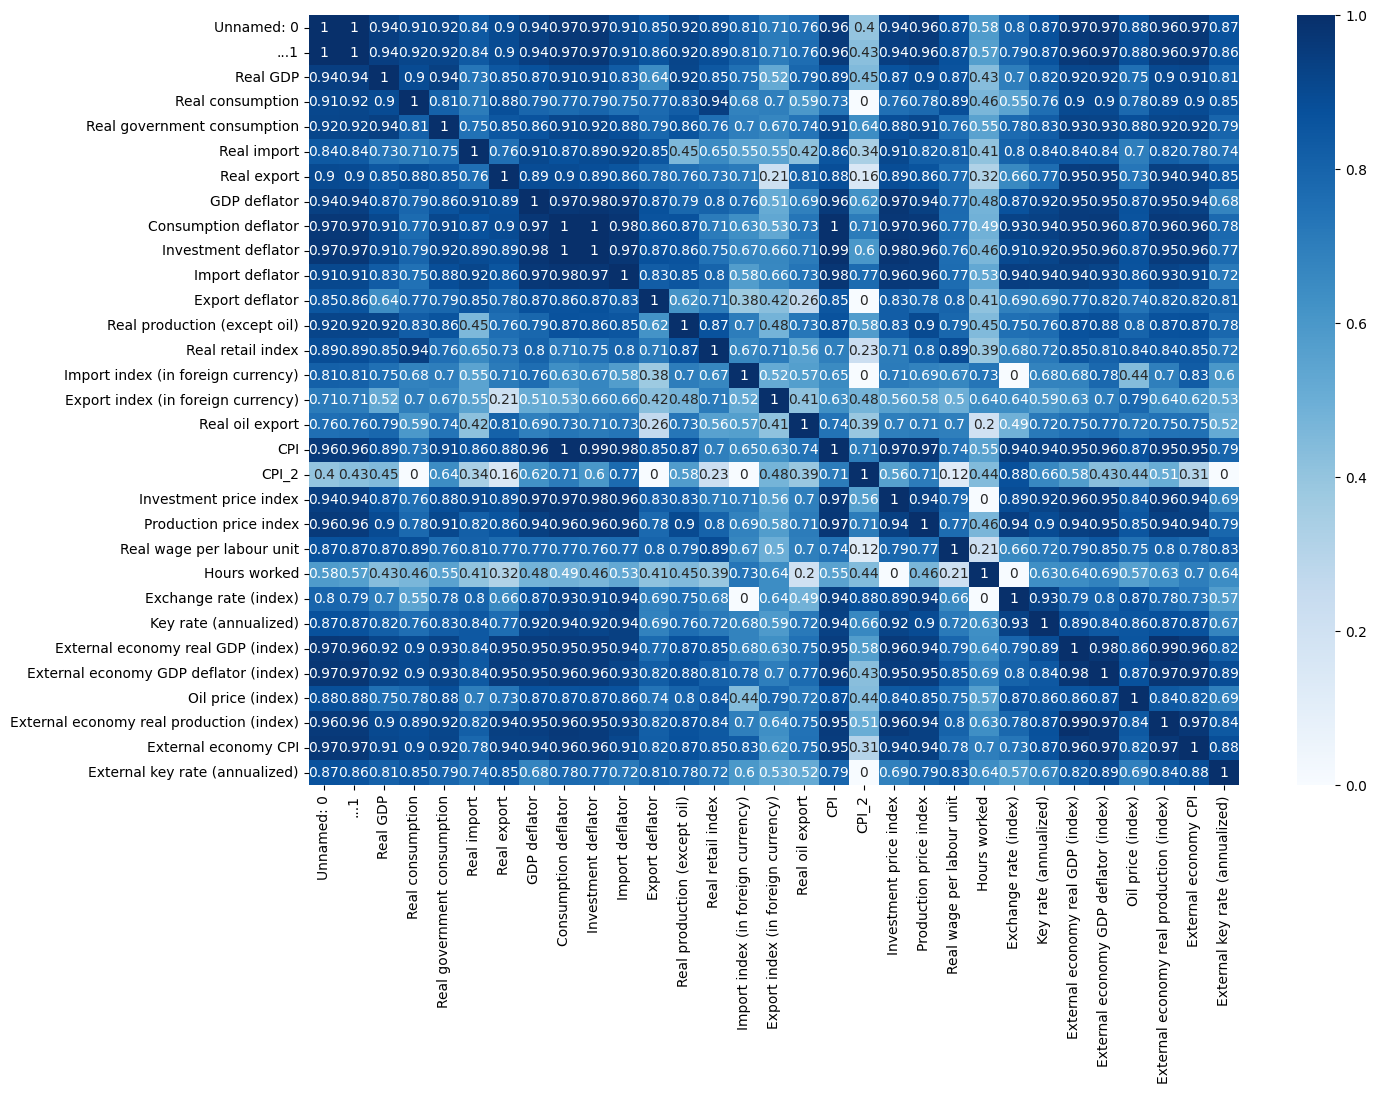

In [16]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df.phik_matrix()
plt.figure(figsize = (15, 10))

sns.heatmap(phik_overview, annot = True, cmap = "Blues")

interval columns not set, guessing: ['Real_consumption_ln', 'Real consumption_1', 'RGC_ln', 'CPI_2_Лаг_1', 'Production_rice_index_ln', 'Exchange_rate_(index)_ln', 'Oil_price_(index)_ln', 'External_economy_real_production_(index)_ln', 'CPI_2']


<Axes: >

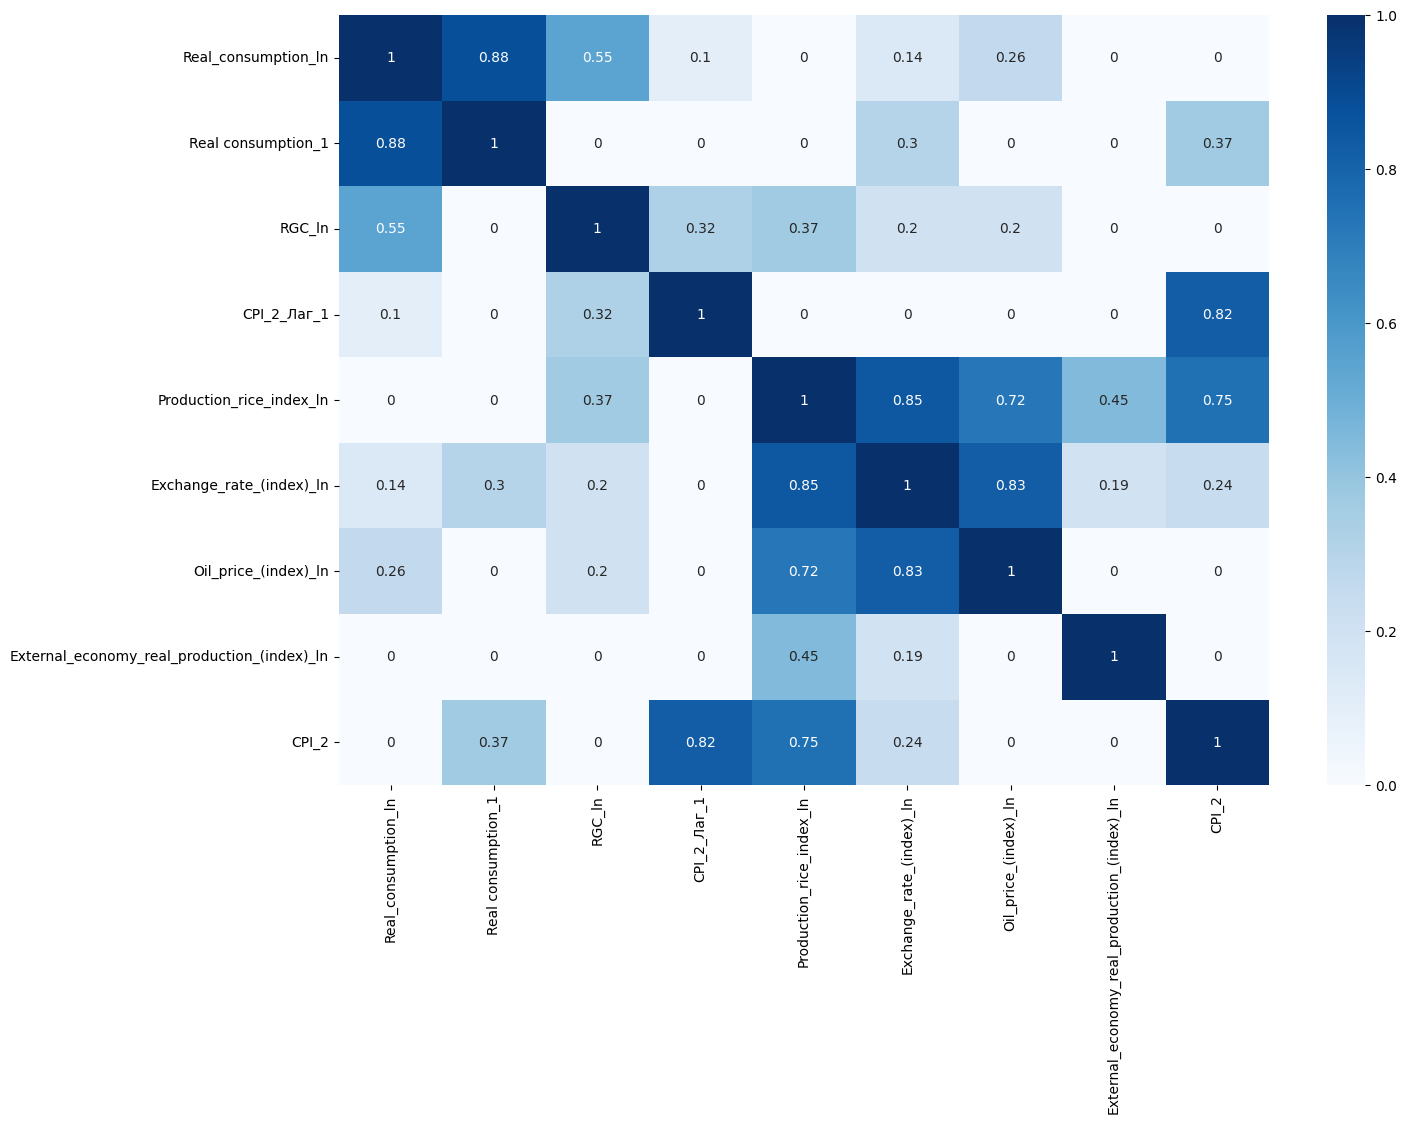

In [319]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df[['Real_consumption_ln',
        'Real consumption_1', 
        'RGC_ln', 
        'CPI_2_Лаг_1', 
        'Production_rice_index_ln', 
        'Exchange_rate_(index)_ln', 
        'Oil_price_(index)_ln', 
        'External_economy_real_production_(index)_ln',
        'CPI_2']].phik_matrix()
plt.figure(figsize = (15, 10))

sns.heatmap(phik_overview, annot = True, cmap = "Blues")

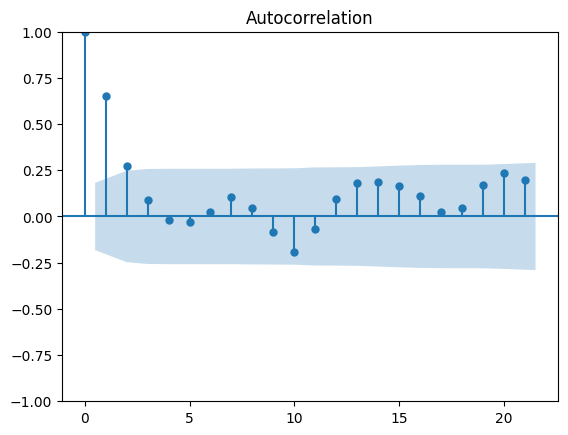

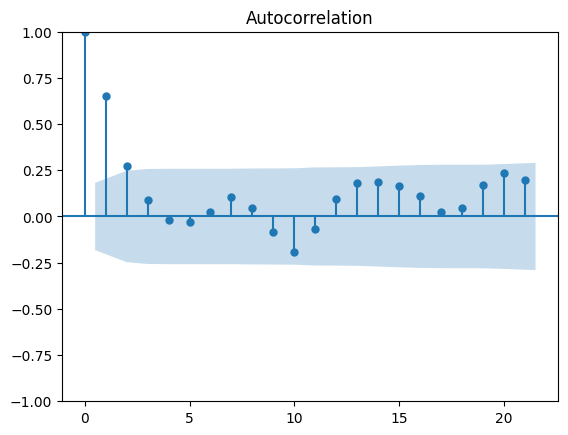

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
 
plot_acf(df['CPI_2'])

In [19]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]
 
y_train = train_data['CPI_2']
y_test = test_data['CPI_2']

In [20]:
y_train

1    -0.238753
2     0.141871
3    -0.616851
4    -0.581558
5     0.391384
        ...   
88    0.763111
89    0.615435
90    1.400829
91    1.374635
92    0.709513
Name: CPI_2, Length: 92, dtype: float64

In [21]:
y_test

93     0.587645
94     0.643559
95     0.368734
96    -0.002097
97     0.225478
98     0.855226
99     0.774024
100    0.078993
101   -0.065000
102    0.148863
103    0.576652
104    0.526003
105    0.681554
106    0.635095
107    0.743175
108    0.550356
109    0.708761
110    1.755126
111    2.226939
112    1.554681
113    1.375080
114    1.051014
115    0.501214
116    0.674913
Name: CPI_2, dtype: float64

In [25]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
# Create and train the autoregressive model
lag_order = 2 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags = lag_order)
ar_results = ar_model.fit()

C:\Users\kapra\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [26]:
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                  CPI_2   No. Observations:                   92
Model:                     AutoReg(2)   Log Likelihood                 -57.547
Method:               Conditional MLE   S.D. of innovations              0.459
Date:                Tue, 30 Jul 2024   AIC                            123.094
Time:                        16:21:53   BIC                            133.093
Sample:                             2   HQIC                           127.126
                                   92                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1372      0.053      2.568      0.010       0.032       0.242
CPI_2.L1       0.7748      0.101      7.700      0.000       0.578       0.972
CPI_2.L2      -0.3045      0.102     -2.977      0.0

In [628]:
df.columns

Index(['Unnamed: 0', 'Real GDP', 'Real_consumption', 'Real_consumption_ln',
       'Real_consumption_1', 'Real government consumption',
       'Real_government_consumption_ln', 'Real import', 'Real export',
       'GDP deflator', 'Consumption deflator', 'Investment deflator',
       'Import deflator', 'Export deflator', 'Real production (except oil)',
       'Real retail index', 'Import index (in foreign currency)',
       'Export index (in foreign currency)', 'Real oil export', 'CPI',
       'CPI_ln', 'CPI_1', 'CPI_2', 'Investment price index',
       'Production_price_index', 'Production_price_index_ln',
       'Real wage per labour unit', 'Hours worked', 'Exchange rate (index)',
       'Exchange_rate_(index)_ln', 'Key rate (annualized)', 'Key_rate_ln',
       'Key_rate_1', 'External economy real GDP (index)',
       'External economy GDP deflator (index)', 'Oil price (index)',
       'Oil_price_(index)_ln', 'External economy real production (index)',
       'External_economy_real_pr

In [645]:
Z = df[[
        'Real_consumption_ln',
        #'Real_consumption_1', 
        'Real_government_consumption_ln', 
        'CPI_1', 
        #'CPI_2',
        'Production_price_index_ln', 
        'Exchange_rate_(index)_ln', 
        'Oil_price_(index)_ln', 
        'External_economy_real_production_(index)_ln',
        'CPI_ln',
        #'Key_rate_ln',
        #'Key_rate_1',
       ]]

In [646]:
#X = df[['Real government consumption', 'GDP deflator', 'Consumption deflator', 'Import index (in foreign currency)', 'Investment price index', 
#        'Exchange rate (index)', 'Key rate (annualized)', 'CPI_2_Лаг_1', 'CPI_2_Лаг_2']]

X = df[[
    #'Real_GDP_ln', 
    #'Real_GDP_1', 
    'Real_consumption_ln',
#    'Real_consumption_1', 
    'Real_government_consumption_ln', 
    #'RGC_1', 
    #'Real_import_ln',
    #'Real_import_1', 
    #'Real_export_ln', 
    #'Real_export_1', 
    #'GDP_deflator_ln',
    #'GDP_deflator_1', 
    #'Consumption_deflator_ln', 
    #'Consumption_deflator_1',
    #'Investment_deflator_ln', 
    #'Investment_deflator_1', 
#    'Import_deflator_ln',
    #'Import_deflator_1', 
    #'Export_deflator_ln', 
    #'Export_deflator_1',
    #'Real_production_ln', 
    #'Real_production_1', 
    #'Real_retail_index_ln',
    #'Real_retail_index_1', 
    #'Import_index_ln', 
    #'Import_index_1',
    #'Export_index_ln', 
    #'Export_index_1', 
    #'Real_oil_export_ln',
    #'Real_oil_export_1', 
    'CPI_1',
    #'CPI_2',
    #'CPI_2_Лаг_2',
    #'Investment_price_index_ln', 
    #'Investment_price_index_1',
    'Production_price_index_ln', 
    #'Production_rice_index_1', 
    #'Real_unit_ln',
    #'Real_unit_1', 
    #'Hours_worked_ln', 
    #'Hours_worked_1',
    'Exchange_rate_(index)_ln', 
    #'Exchange_rate_(index)_1', 
    #'Key_rate_ln',
    #'Key_rate_1', 
    #'External_GDP_(index)_ln', 
    #'External_GDP_(index)_1',
    #'External_GDP_deflator_(index)_ln', 
    # External_GDP_deflator_(index)_1',
    'Oil_price_(index)_ln', 
    #'Oil_price_(index)_1',
    'External_economy_real_production_(index)_ln',
    #'External_economy_real_production_(index)_1', 
    #'External_economy_CPI_ln',
    #'External_economy_CPI_1', 
    #'External_key_rate_(annualized)_ln',
    #'External_key_rate_(annualized)_1'
    #'Key_rate_ln',
    #'Key_rate_1',
]]

Y = df['CPI_ln']
# Делим имеющуюся выборку на обучающую и тестовую
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [647]:
train_size = int(0.8 * len(Z))
train_data = Z[:train_size]
test_data = Z[train_size:]
 
y_train = train_data['CPI_ln']
y_test = test_data['CPI_ln']

x_train = train_data.drop(['CPI_ln'], axis = 1)
x_test = test_data.drop(['CPI_ln'], axis = 1)

In [648]:
x_test

,Real_consumption_ln,Real_government_consumption_ln,CPI_1,Production_price_index_ln,Exchange_rate_(index)_ln,Oil_price_(index)_ln,External_economy_real_production_(index)_ln
94,-0.185159,-0.160685,0.587645,0.577081,3.107058,-1.424809,0.118356
95,-0.577975,-0.282138,0.643559,0.971454,5.161212,-11.988824,0.135138
96,-0.837186,-0.374150,0.368734,0.588190,3.251510,-4.577354,-0.418262
97,-0.767882,-0.419028,-0.002097,0.142840,1.022766,-1.332945,0.168719
98,-0.476724,-0.369851,0.225478,1.729529,5.991763,-11.140830,-0.258747
99,-0.072125,-0.176488,0.855226,0.944318,2.956960,-5.358243,0.195665
100,0.334232,0.213748,0.774024,-0.649397,-4.344898,10.227951,0.623344
101,0.631408,0.569391,0.078993,0.163650,-1.290556,-0.190464,-0.496979
102,0.710950,0.661447,-0.065000,-0.750585,-3.543391,6.971706,0.539551
103,0.465608,0.263532,0.148863,0.617334,0.586773,-1.313905,1.132763


In [649]:
X = sm.add_constant(x_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

                            OLS Regression Results                            
Dep. Variable:                 CPI_ln   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     54.21
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.50e-28
Time:                        14:31:56   Log-Likelihood:                -3.8652
No. Observations:                  91   AIC:                             23.73
Df Residuals:                      83   BIC:                             43.82
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [461]:
pred_train = results.predict(X)
mse_train = mse(y_train, pred_train)

In [462]:
print("MAE на обучении:", round(mae(y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(y_train, pred_train)), 4))

MAE на обучении: 0.2001
RMSE на обучении: 0.2525


interval columns not set, guessing: ['Real_consumption_ln', 'Real_government_consumption_ln', 'CPI_1', 'Production_price_index_ln', 'Exchange_rate_(index)_ln', 'Oil_price_(index)_ln', 'External_economy_real_production_(index)_ln', 'CPI_ln']


<Axes: >

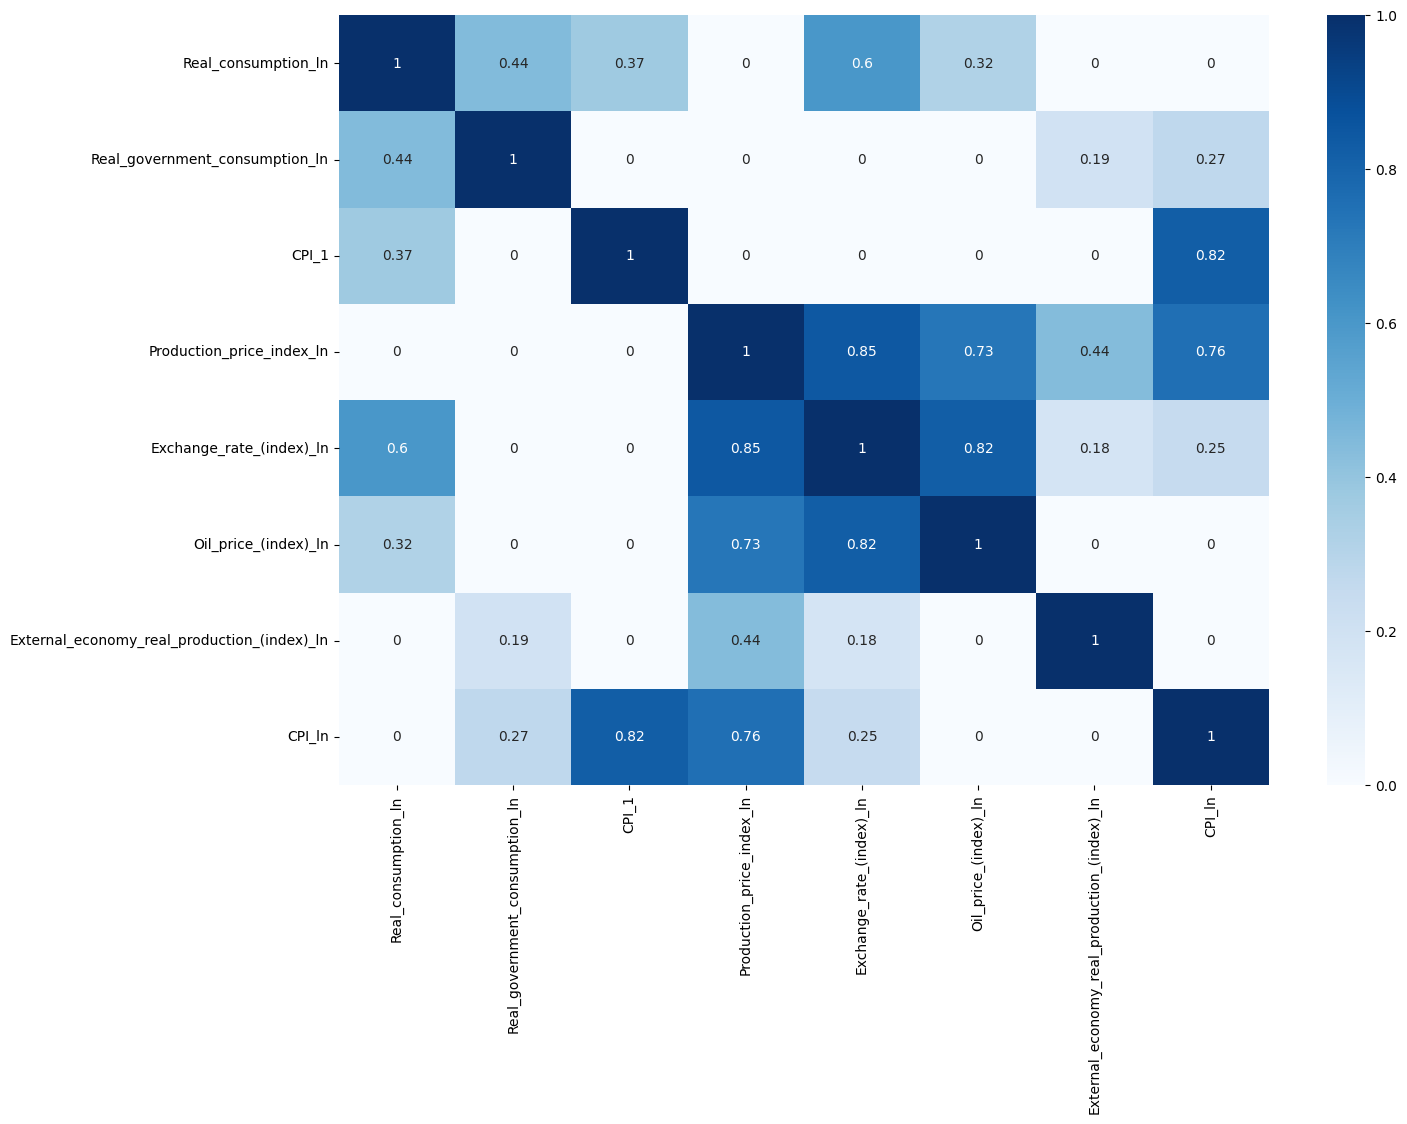

In [650]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df[[
                    'Real_consumption_ln',
                    #'Real_consumption_1', 
                    'Real_government_consumption_ln', 
                    'CPI_1', 
                    'Production_price_index_ln', 
                    'Exchange_rate_(index)_ln', 
                    'Oil_price_(index)_ln', 
                    'External_economy_real_production_(index)_ln',
                    'CPI_ln']].phik_matrix()
plt.figure(figsize = (15, 10))

sns.heatmap(phik_overview, annot = True, cmap = "Blues")

In [464]:
X_1 = sm.add_constant(x_test)

In [465]:
pred_test = results.predict(X_1)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))

MAE на тесте: 0.1891
RMSE на тесте: 0.2509
R2 на тесте: 0.793


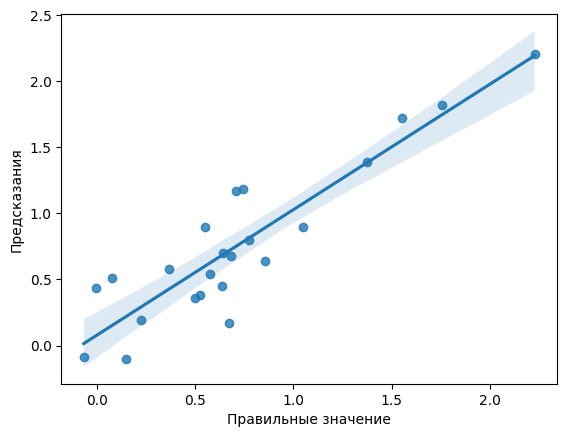

In [473]:
sns.regplot(x = y_test, y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

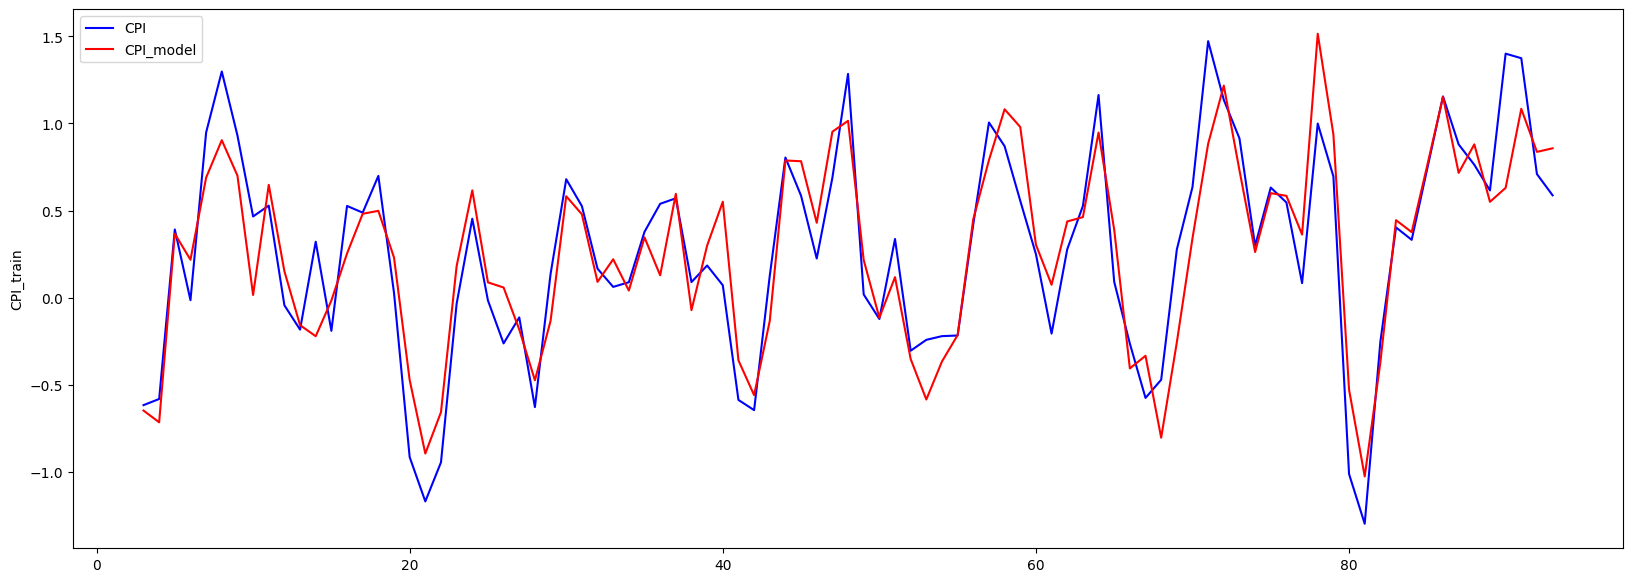

In [466]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
ax.plot(y_train, c = 'b', label = "CPI") # цена
ax.plot(pred_train, c = 'r', label = "CPI_model") # прогноз цены по модели регрессии
plt.ylabel('CPI_train')
ax.legend(loc = 2);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

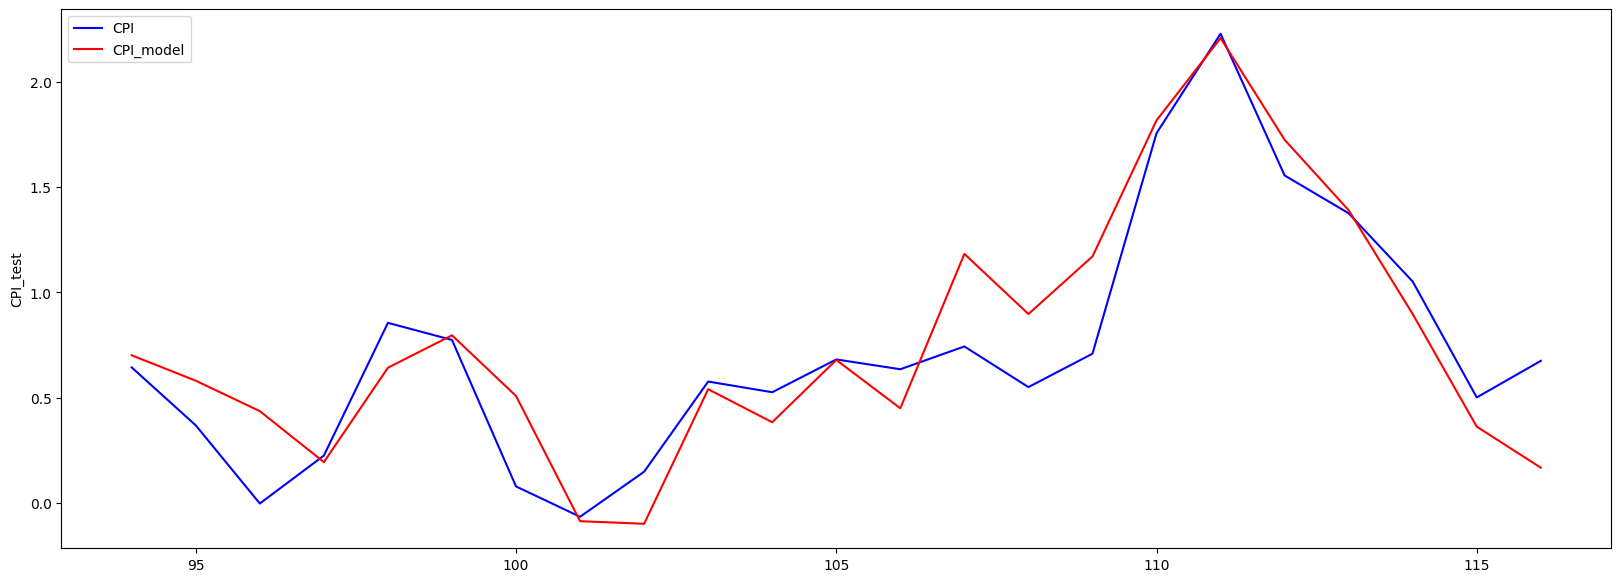

In [467]:
fig, ax = plt.subplots(1, 1, figsize = (20,7))
ax.plot(y_test, c = 'b', label = "CPI") # цена
ax.plot(pred_test, c = 'r', label = "CPI_model") # прогноз цены по модели регрессии
plt.ylabel('CPI_test')
ax.legend(loc = 2);
plt.show

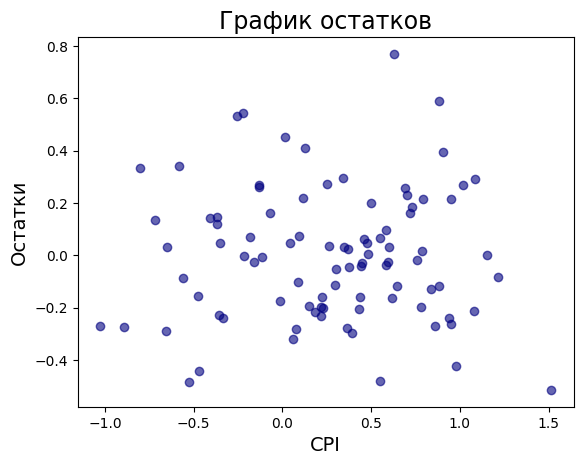

In [468]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

C:\Users\kapra\AppData\Local\Temp\ipykernel_99072\1738737157.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




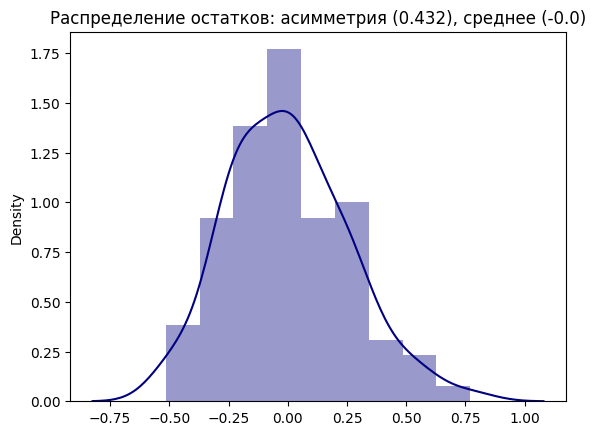

In [469]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [470]:
reg = pd.read_excel(r"C:\Users\kapra\Desktop\Стас_ipynb\Задача 1 постановка\Задача 1 постановка\monthly_database_2.xlsx", sheet_name = 2)
reg

,CPI_ln,CPI_ln.1
0,0.141871,-0.507636
1,-0.616851,-0.647928
2,-0.581558,-0.715443
3,0.391384,0.367078
4,-0.014367,0.217774
...,...,...
113,0.501214,0.362501
114,0.674913,0.167952
115,1.034871,0.621298
116,0.891557,0.878245


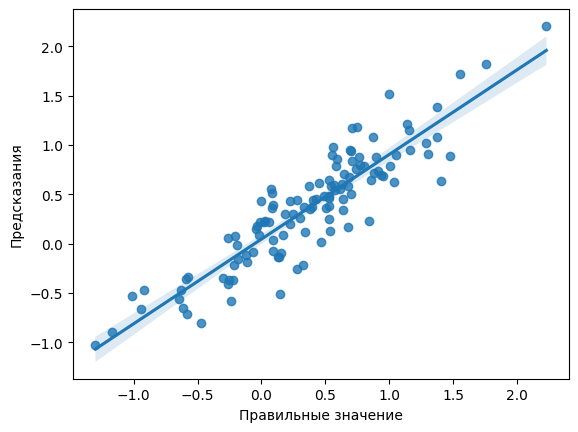

In [472]:
sns.regplot(x = reg['CPI_ln'], y = reg['CPI_ln.1'])
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [476]:
from statsmodels.tsa.arima.model import ARIMA

In [491]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]
 
y_train = train_data['Real_consumption']
y_test = test_data['Real_consumption']

x_train = train_data['Real_consumption']
x_test = test_data['Real_consumption']

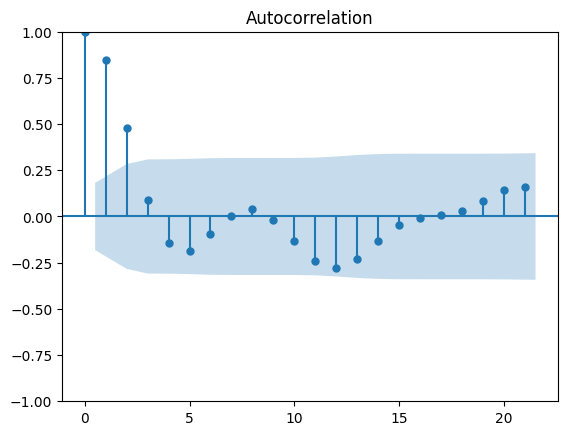

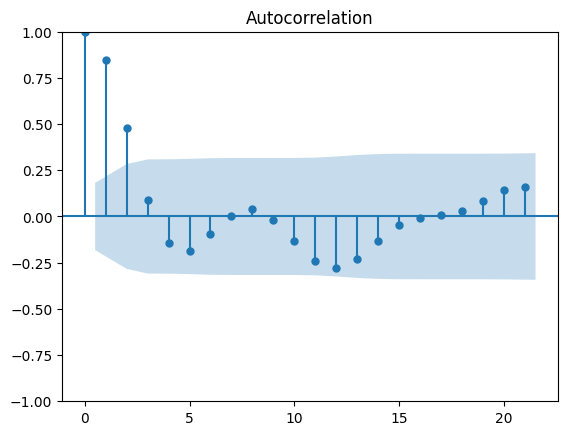

In [566]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Real_consumption_ln'].dropna())

In [567]:
model = ARIMA(df['Real_consumption'].dropna(), order = (3, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()

In [568]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:       Real_consumption   No. Observations:                  117
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 629.934
Date:                Wed, 31 Jul 2024   AIC                          -1251.868
Time:                        11:15:50   BIC                          -1240.854
Sample:                             0   HQIC                         -1247.397
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2045      0.060     36.846      0.000       2.087       2.322
ar.L2         -2.0256      0.092    -22.083      0.000      -2.205      -1.846
ar.L3          0.7561      0.051     14.863      0.0

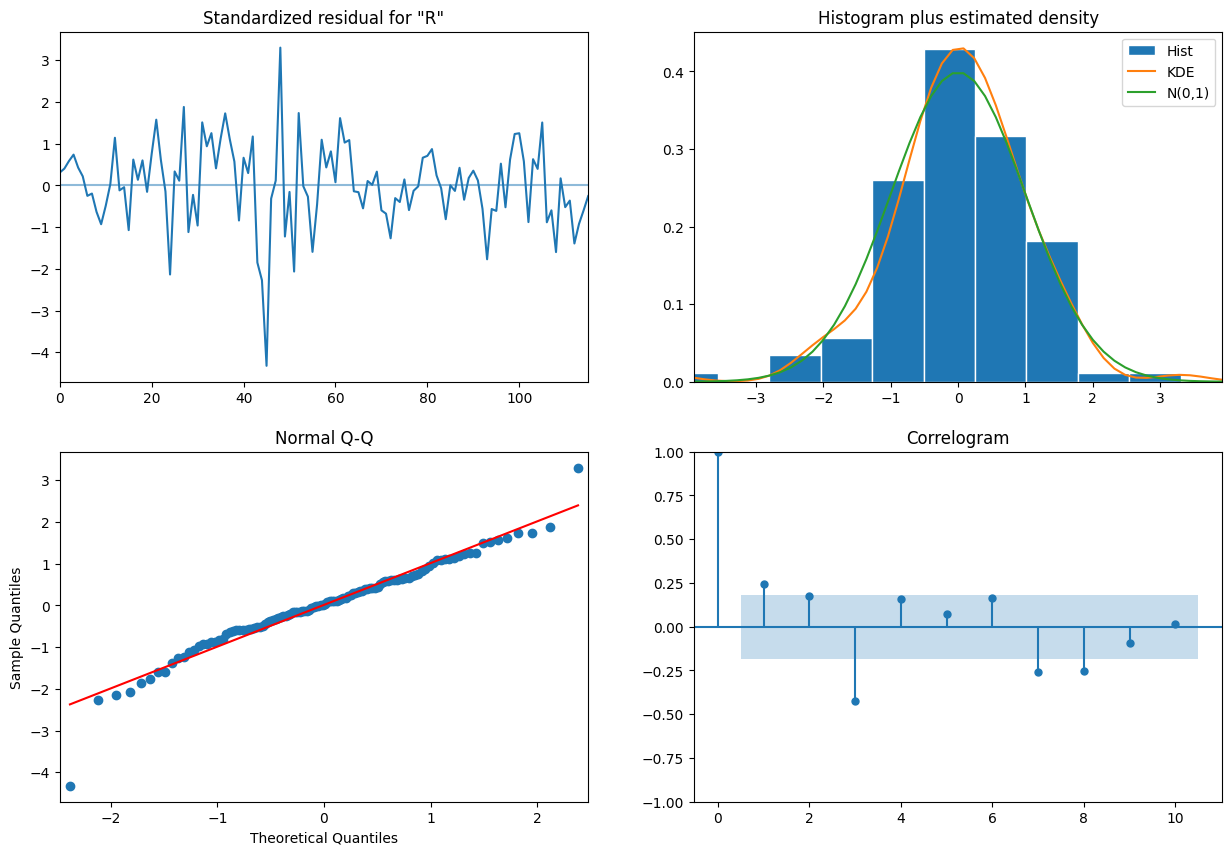

In [569]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [571]:
pred = result.forecast(40)
pred

117    1.132525
118    1.128500
119    1.125232
120    1.122397
121    1.119722
122    1.117099
123    1.114589
124    1.112348
125    1.110509
126    1.109095
127    1.108010
128    1.107090
129    1.106194
130    1.105257
131    1.104316
132    1.103457
133    1.102766
134    1.102267
135    1.101919
136    1.101641
137    1.101354
138    1.101022
139    1.100662
140    1.100322
141    1.100053
142    1.099875
143    1.099771
144    1.099698
145    1.099614
146    1.099499
147    1.099358
148    1.099219
149    1.099109
150    1.099044
151    1.099016
152    1.099004
153    1.098986
154    1.098947
155    1.098890
156    1.098830
Name: predicted_mean, dtype: float64

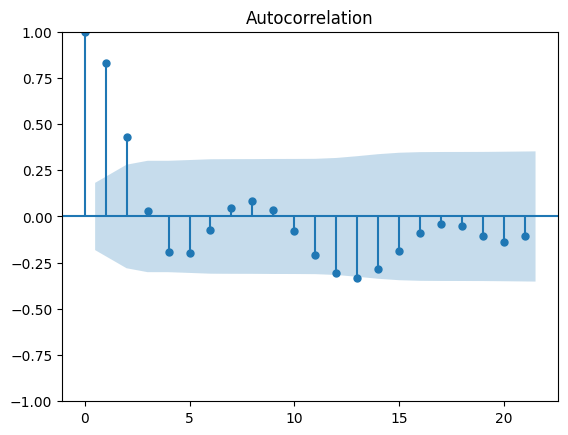

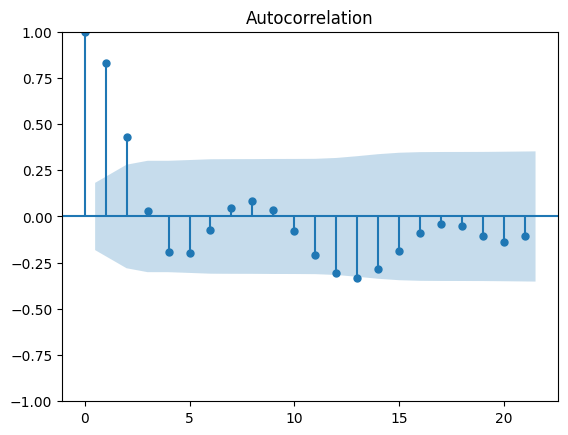

In [572]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Real_government_consumption_ln'].dropna())

In [573]:
model = ARIMA(df['Real government consumption'].dropna(), order = (3, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()

C:\Users\kapra\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



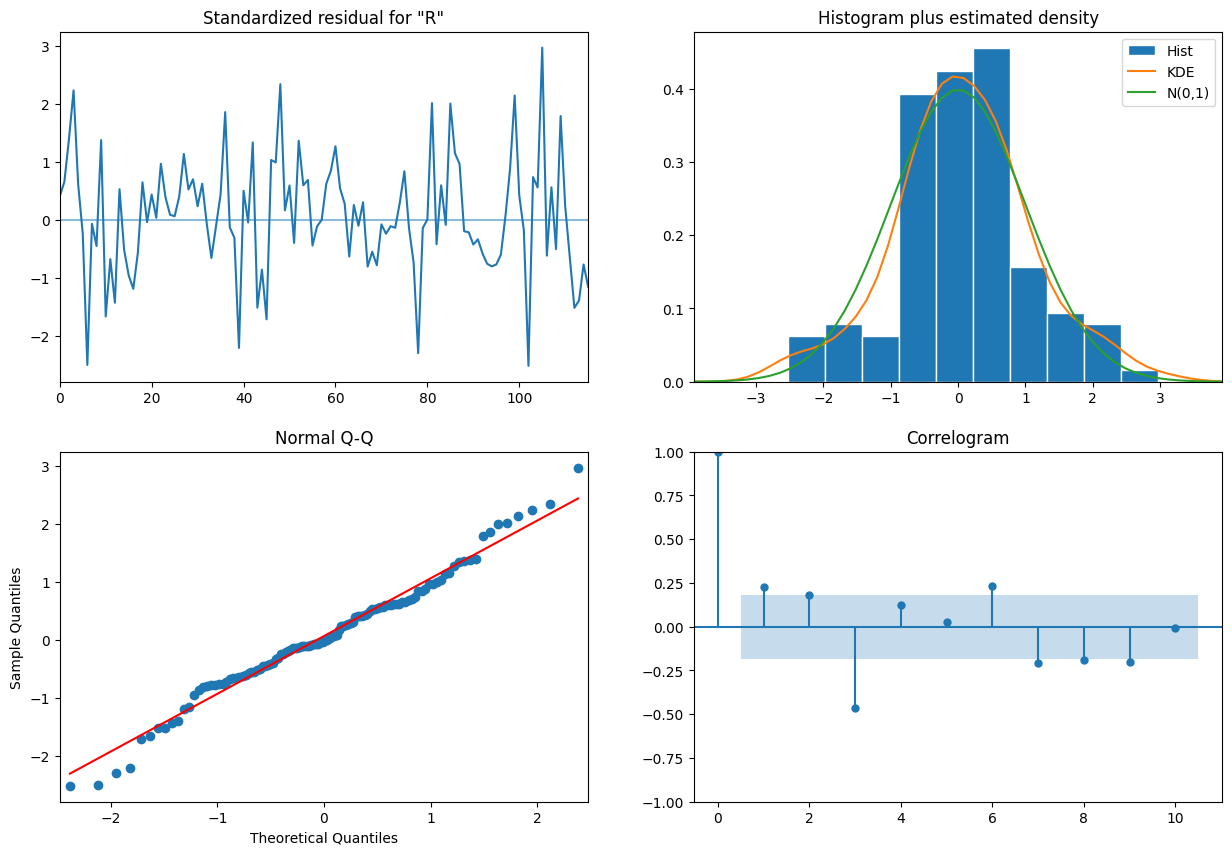

In [574]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [575]:
pred = result.forecast(40)
pred

117    0.482307
118    0.481206
119    0.480699
120    0.480377
121    0.479862
122    0.479008
123    0.477938
124    0.476932
125    0.476240
126    0.475939
127    0.475914
128    0.475938
129    0.475816
130    0.475486
131    0.475028
132    0.474602
133    0.474342
134    0.474283
135    0.474353
136    0.474430
137    0.474412
138    0.474272
139    0.474062
140    0.473872
141    0.473772
142    0.473777
143    0.473845
144    0.473906
145    0.473909
146    0.473844
147    0.473742
148    0.473653
149    0.473614
150    0.473631
151    0.473678
152    0.473717
153    0.473722
154    0.473688
155    0.473636
156    0.473594
Name: predicted_mean, dtype: float64

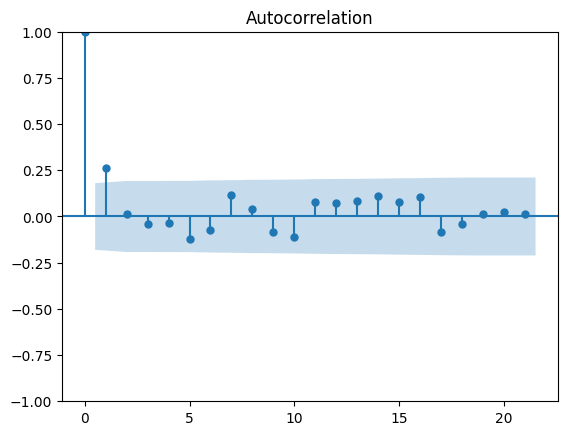

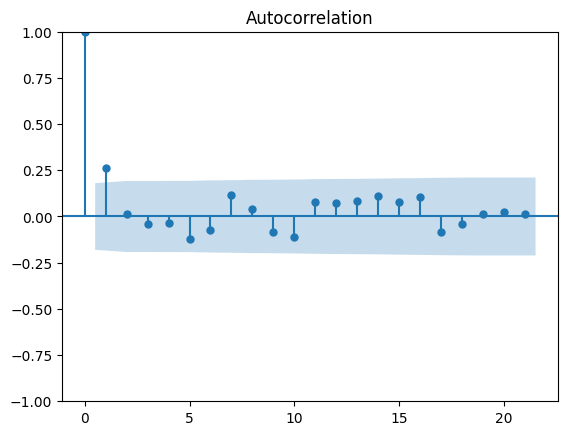

In [576]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Production_price_index_ln'].dropna())

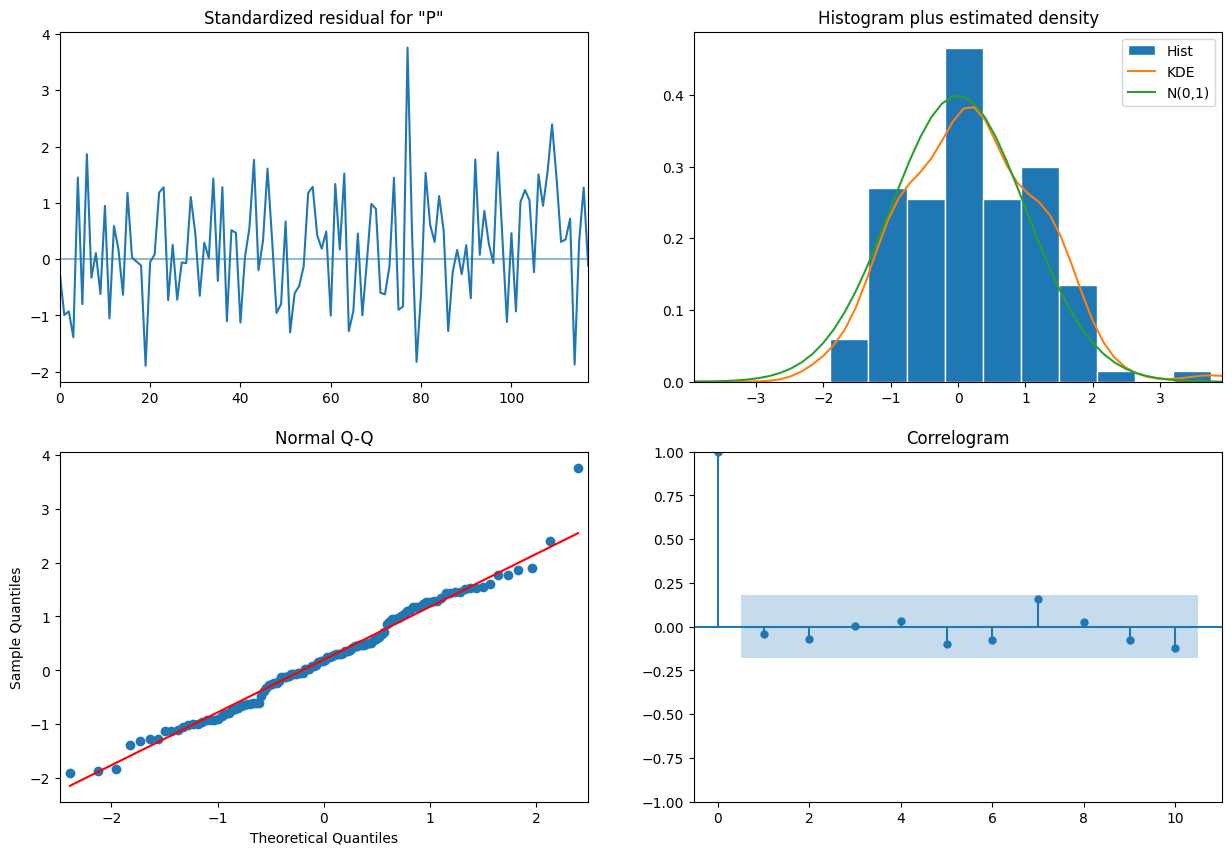

In [577]:
model = ARIMA(df['Production_price_index'].dropna(), order = (2, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [579]:
pred = result.forecast(40)
pred

119    1.390015
120    1.390385
121    1.390509
122    1.390551
123    1.390565
124    1.390570
125    1.390571
126    1.390572
127    1.390572
128    1.390572
129    1.390572
130    1.390572
131    1.390572
132    1.390572
133    1.390572
134    1.390572
135    1.390572
136    1.390572
137    1.390572
138    1.390572
139    1.390572
140    1.390572
141    1.390572
142    1.390572
143    1.390572
144    1.390572
145    1.390572
146    1.390572
147    1.390572
148    1.390572
149    1.390572
150    1.390572
151    1.390572
152    1.390572
153    1.390572
154    1.390572
155    1.390572
156    1.390572
157    1.390572
158    1.390572
Name: predicted_mean, dtype: float64

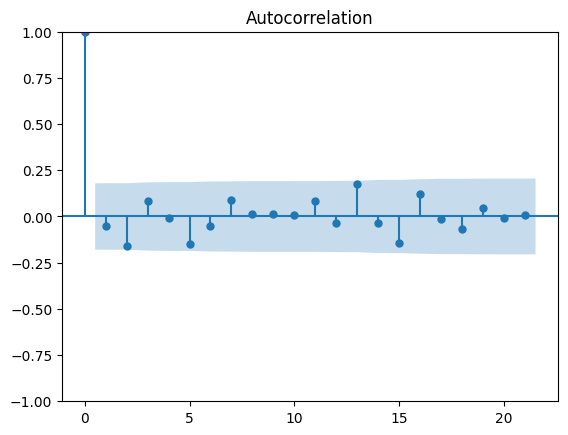

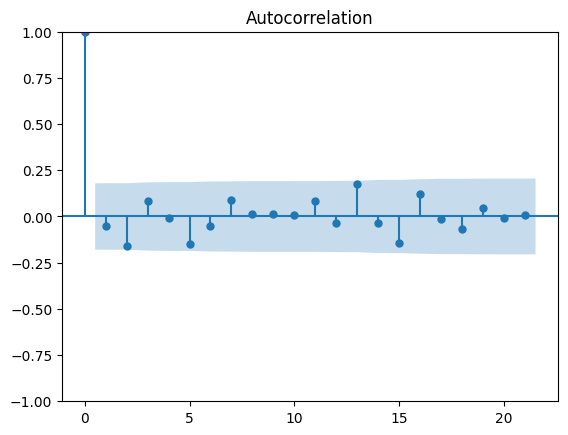

In [580]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Exchange_rate_(index)_ln'].dropna())

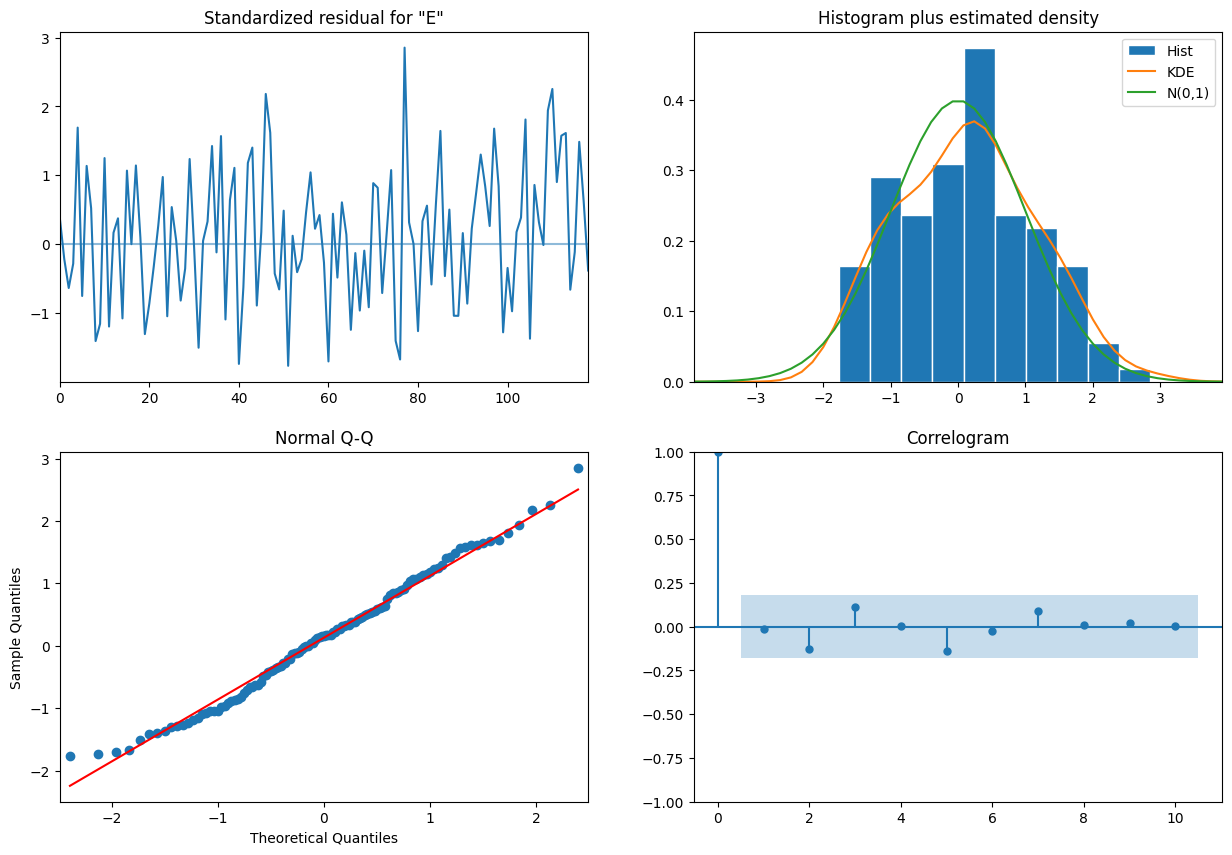

In [581]:
model = ARIMA(df['Exchange rate (index)'].dropna(), order = (1, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [583]:
pred = result.forecast(40)
pred

120    1.674310
121    1.674306
122    1.674306
123    1.674306
124    1.674306
125    1.674306
126    1.674306
127    1.674306
128    1.674306
129    1.674306
130    1.674306
131    1.674306
132    1.674306
133    1.674306
134    1.674306
135    1.674306
136    1.674306
137    1.674306
138    1.674306
139    1.674306
140    1.674306
141    1.674306
142    1.674306
143    1.674306
144    1.674306
145    1.674306
146    1.674306
147    1.674306
148    1.674306
149    1.674306
150    1.674306
151    1.674306
152    1.674306
153    1.674306
154    1.674306
155    1.674306
156    1.674306
157    1.674306
158    1.674306
159    1.674306
Name: predicted_mean, dtype: float64

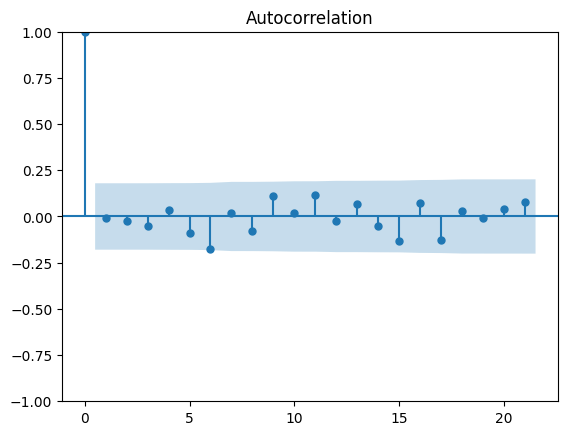

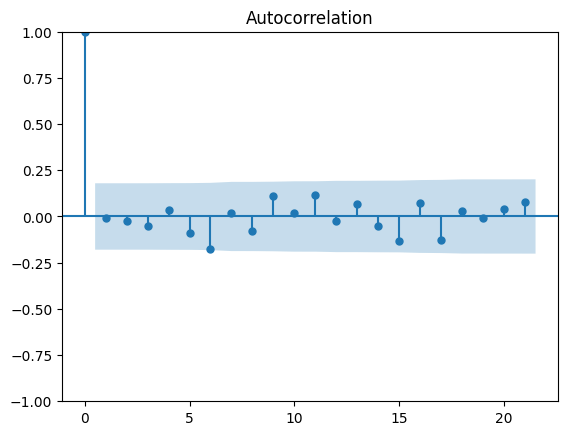

In [584]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Oil_price_(index)_ln'].dropna())

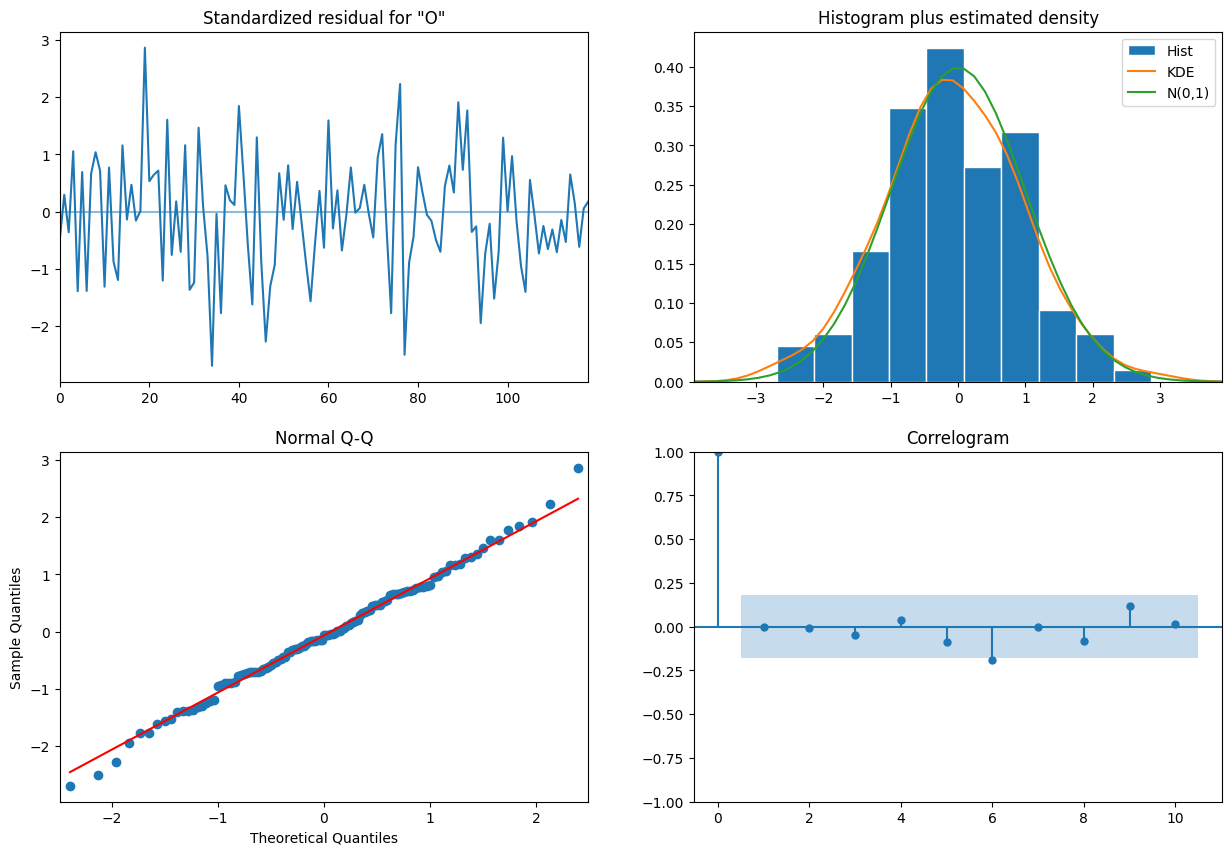

In [585]:
model = ARIMA(df['Oil price (index)'].dropna(), order = (1, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [586]:
pred = result.forecast(40)
pred

120    0.559754
121    0.559762
122    0.559761
123    0.559761
124    0.559761
125    0.559761
126    0.559761
127    0.559761
128    0.559761
129    0.559761
130    0.559761
131    0.559761
132    0.559761
133    0.559761
134    0.559761
135    0.559761
136    0.559761
137    0.559761
138    0.559761
139    0.559761
140    0.559761
141    0.559761
142    0.559761
143    0.559761
144    0.559761
145    0.559761
146    0.559761
147    0.559761
148    0.559761
149    0.559761
150    0.559761
151    0.559761
152    0.559761
153    0.559761
154    0.559761
155    0.559761
156    0.559761
157    0.559761
158    0.559761
159    0.559761
Name: predicted_mean, dtype: float64

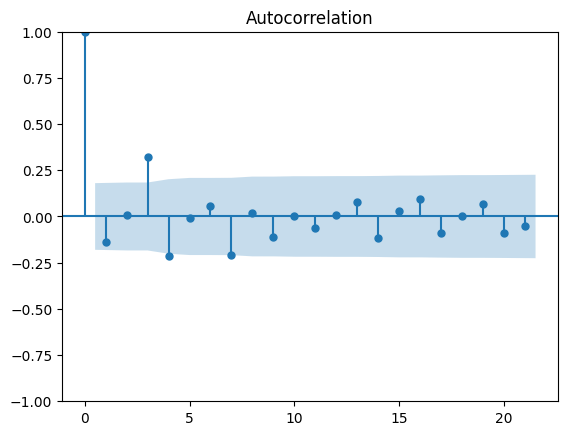

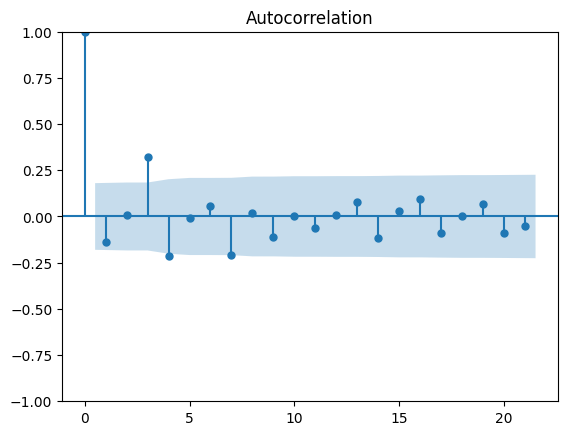

In [587]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['External_economy_real_production_(index)_ln'].dropna())

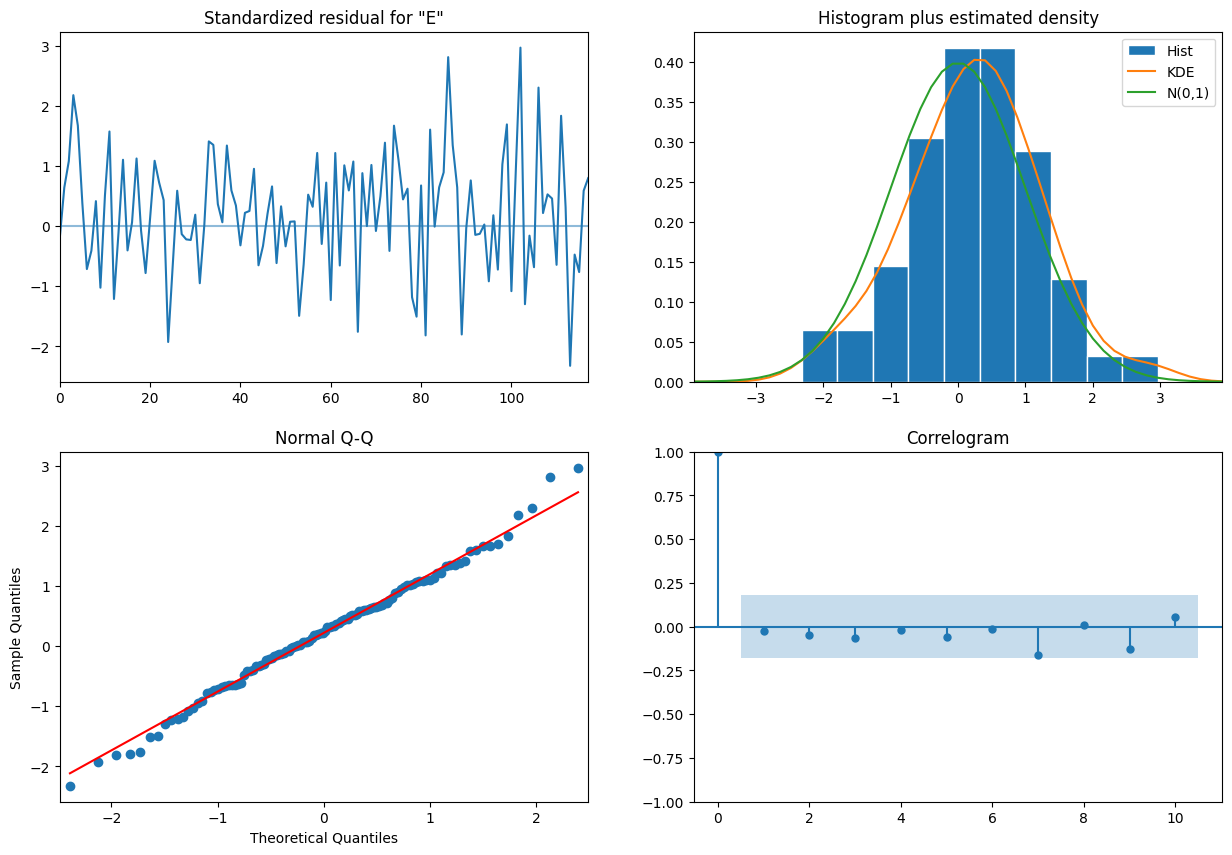

In [588]:
model = ARIMA(df['External economy real production (index)'].dropna(), order = (4, 1, 0)) #вставьте свои числа вместо p, d и q
result = model.fit()
result.plot_diagnostics(figsize=(15, 10))
plt.show()

In [589]:
pred = result.forecast(40)
pred

119    1.167038
120    1.167607
121    1.169199
122    1.167875
123    1.168574
124    1.168988
125    1.168373
126    1.168859
127    1.168871
128    1.168642
129    1.168909
130    1.168831
131    1.168773
132    1.168896
133    1.168828
134    1.168829
135    1.168877
136    1.168836
137    1.168850
138    1.168864
139    1.168844
140    1.168857
141    1.168858
142    1.168850
143    1.168857
144    1.168856
145    1.168853
146    1.168857
147    1.168855
148    1.168855
149    1.168856
150    1.168855
151    1.168855
152    1.168856
153    1.168855
154    1.168855
155    1.168856
156    1.168855
157    1.168855
158    1.168855
Name: predicted_mean, dtype: float64

In [364]:
df.columns

Index(['Unnamed: 0', '...1', 'Real GDP', 'Real consumption',
       'Real government consumption', 'Real import', 'Real export',
       'GDP deflator', 'Consumption deflator', 'Investment deflator',
       'Import deflator', 'Export deflator', 'Real production (except oil)',
       'Real retail index', 'Import index (in foreign currency)',
       'Export index (in foreign currency)', 'Real oil export', 'CPI',
       'Investment price index', 'Production price index',
       'Real wage per labour unit', 'Hours worked', 'Exchange rate (index)',
       'Key rate (annualized)', 'External economy real GDP (index)',
       'External economy GDP deflator (index)', 'Oil price (index)',
       'External economy real production (index)', 'External economy CPI',
       'External key rate (annualized)', 'CPI_target'],
      dtype='object')

In [365]:
Z = df[['Real GDP', 'Real consumption',
       'Real government consumption', 'Real import', 'Real export',
       'GDP deflator', 'Consumption deflator', 'Investment deflator',
       'Import deflator', 'Export deflator', 'Real production (except oil)',
       'Real retail index', 'Import index (in foreign currency)',
       'Export index (in foreign currency)', 'Real oil export', 'CPI',
       'Investment price index', 'Production price index',
       'Real wage per labour unit', 'Hours worked', 'Exchange rate (index)',
       'Key rate (annualized)', 'External economy real GDP (index)',
       'External economy GDP deflator (index)', 'Oil price (index)',
       'External economy real production (index)', 'External economy CPI',
       'External key rate (annualized)', 'CPI_target']]

In [367]:
X = df[[
    'Real GDP', 'Real consumption',
       'Real government consumption', 'Real import', 'Real export',
       'GDP deflator', 'Consumption deflator', 'Investment deflator',
       'Import deflator', 'Export deflator', 'Real production (except oil)',
       'Real retail index', 'Import index (in foreign currency)',
       'Export index (in foreign currency)', 'Real oil export', 'CPI',
       'Investment price index', 'Production price index',
       'Real wage per labour unit', 'Hours worked', 'Exchange rate (index)',
       'Key rate (annualized)', 'External economy real GDP (index)',
       'External economy GDP deflator (index)', 'Oil price (index)',
       'External economy real production (index)', 'External economy CPI',
       'External key rate (annualized)'
]]

Y = df['CPI_target']

In [368]:
train_size = int(0.8 * len(Z))
train_data = Z[:train_size]
test_data = Z[train_size:]
 
y_train = train_data['CPI_target']
y_test = test_data['CPI_target']

x_train = train_data.drop(['CPI_target'], axis = 1)
x_test = test_data.drop(['CPI_target'], axis = 1)

In [371]:
X = sm.add_constant(x_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

                            OLS Regression Results                            
Dep. Variable:             CPI_target   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.721
Date:                Tue, 30 Jul 2024   Prob (F-statistic):             0.0403
Time:                        23:49:34   Log-Likelihood:                -49.722
No. Observations:                  88   AIC:                             157.4
Df Residuals:                      59   BIC:                             229.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [377]:
pred_train = results.predict(X)
mse_train = mse(y_train, pred_train)

In [372]:
X_1 = sm.add_constant(x_test)

In [373]:
pred_test = results.predict(X_1)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("MAPE на тесте:", round(mape(y_test, pred_test), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))

MAE на тесте: 1.0646
RMSE на тесте: 1.2291
MAPE на тесте: 1.8749
R2 на тесте: -4.5345


<function matplotlib.pyplot.show(close=None, block=None)>

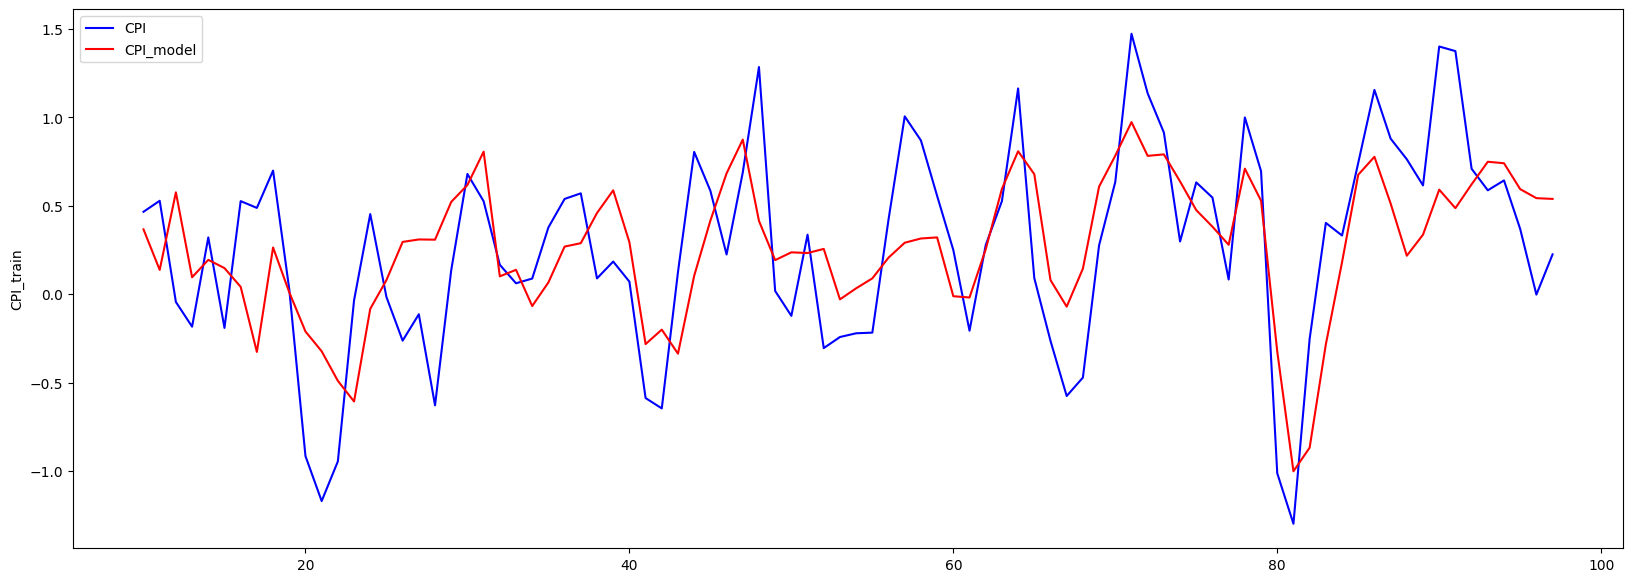

In [378]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
ax.plot(y_train, c = 'b', label = "CPI") # цена
ax.plot(pred_train, c = 'r', label = "CPI_model") # прогноз цены по модели регрессии
plt.ylabel('CPI_train')
ax.legend(loc = 2);
plt.show

In [376]:
pred_train

0    -0.541941
1    -0.555643
2    -0.841626
3     0.225432
4     0.290473
        ...   
87    0.755926
88    0.584014
89    0.980101
90    0.823125
91    0.910402
Length: 92, dtype: float64

# Catboost

In [594]:
df = pd.read_excel(r"C:\Users\kapra\Desktop\Стас_ipynb\Задача 1 постановка\Задача 1 постановка\monthly_database_2.xlsx", sheet_name = 0)
df

,Unnamed: 0,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,...,Exchange_rate_(index)_ln,Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
0,1,2.107309,1.066687,NaN,NaN,0.428327,NaN,0.444261,0.641774,1.008923,...,NaN,4.407114,0.996273,0.997501,1.000000,NaN,1.000000,NaN,1.000000,2.724918
1,2,2.105395,1.068403,0.160722,NaN,0.429124,0.185781,0.440197,0.643840,1.005376,...,1.654990,5.950586,0.997759,0.998500,0.971813,-2.859147,0.999159,-0.084166,1.005278,2.655832
2,3,2.103212,1.071033,0.245838,0.160722,0.430488,0.317287,0.434645,0.646838,1.000000,...,-0.896915,6.600451,1.000000,1.000000,0.989791,1.832950,1.001923,0.276308,1.012103,2.862941
3,4,2.102237,1.074649,0.337073,0.245838,0.432740,0.521913,0.428859,0.650373,0.992724,...,-2.782789,6.165965,1.003012,1.002004,0.968436,-2.181050,1.006256,0.431538,1.018361,3.037902
4,5,2.104781,1.079353,0.436728,0.337073,0.436370,0.835236,0.424813,0.653764,0.985698,...,-1.302028,4.889711,1.006863,1.004538,1.030565,6.217961,1.014121,0.778536,1.025355,3.627772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2.335568,1.143526,-0.592286,-0.635757,0.486711,-0.548964,0.368190,0.783805,1.277905,...,-1.696415,13.155818,1.170241,1.191237,0.574075,6.983916,1.169995,0.225460,1.213812,3.719500
116,117,2.329619,1.137530,-0.525729,-0.592286,0.484197,-0.517878,0.362117,0.792547,1.288236,...,-0.335548,13.025598,1.168513,1.192740,0.581620,1.305818,1.165990,-0.342911,1.211419,3.606808
117,118,NaN,NaN,NaN,-0.525729,NaN,NaN,NaN,NaN,NaN,...,3.932416,13.463364,NaN,NaN,0.545680,-6.378448,1.164957,-0.088689,1.211511,3.408239
118,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.642921,14.109537,NaN,NaN,0.549873,0.765388,1.169327,0.374475,1.211065,3.424658


In [595]:
df = df.dropna()
df

,Unnamed: 0,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,...,Exchange_rate_(index)_ln,Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
3,4,2.102237,1.074649,0.337073,0.245838,0.432740,0.521913,0.428859,0.650373,0.992724,...,-2.782789,6.165965,1.003012,1.002004,0.968436,-2.181050,1.006256,0.431538,1.018361,3.037902
4,5,2.104781,1.079353,0.436728,0.337073,0.436370,0.835236,0.424813,0.653764,0.985698,...,-1.302028,4.889711,1.006863,1.004538,1.030565,6.217961,1.014121,0.778536,1.025355,3.627772
5,6,2.111224,1.084825,0.505714,0.436728,0.441019,1.059766,0.423113,0.656859,0.981073,...,7.270085,3.713388,1.011630,1.007633,0.948039,-8.346724,1.021769,0.751283,1.032944,4.593003
6,7,2.120027,1.090320,0.505283,0.505714,0.445476,1.005467,0.423026,0.660023,0.981033,...,-3.062362,4.286692,1.017394,1.011317,0.990579,4.389441,1.025342,0.349126,1.040865,4.973869
7,8,2.127674,1.094648,0.396128,0.505283,0.447642,0.485034,0.422448,0.664167,0.984537,...,4.705971,3.525470,1.022806,1.014994,0.908726,-8.624557,1.026348,0.098103,1.043919,5.827734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,2.358266,1.165087,-0.572180,-0.399317,0.493037,0.051794,0.394933,0.761470,1.237291,...,2.755526,11.781040,1.168509,1.184088,0.573245,-6.855378,1.174189,0.718587,1.217579,3.866187
113,114,2.350303,1.157656,-0.639855,-0.572180,0.491753,-0.260651,0.384338,0.764826,1.252750,...,4.500984,12.850258,1.171019,1.187142,0.565952,-1.280540,1.176161,0.167886,1.219134,3.805227
114,115,2.342557,1.150319,-0.635757,-0.639855,0.489390,-0.481798,0.375517,0.773722,1.266179,...,4.439452,13.488805,1.171335,1.189448,0.535350,-5.558801,1.167361,-0.751090,1.215551,4.044613
115,116,2.335568,1.143526,-0.592286,-0.635757,0.486711,-0.548964,0.368190,0.783805,1.277905,...,-1.696415,13.155818,1.170241,1.191237,0.574075,6.983916,1.169995,0.225460,1.213812,3.719500


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 3 to 116
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   114 non-null    int64  
 1   Real GDP                                     114 non-null    float64
 2   Real_consumption                             114 non-null    float64
 3   Real_consumption_ln                          114 non-null    float64
 4   Real_consumption_1                           114 non-null    float64
 5   Real government consumption                  114 non-null    float64
 6   Real_government_consumption_ln               114 non-null    float64
 7   Real import                                  114 non-null    float64
 8   Real export                                  114 non-null    float64
 9   GDP deflator                                 114 non-null    float64
 10  Consump

In [598]:
Z = df.drop(['Unnamed: 0'], axis = 1)
Z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 3 to 116
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Real GDP                                     114 non-null    float64
 1   Real_consumption                             114 non-null    float64
 2   Real_consumption_ln                          114 non-null    float64
 3   Real_consumption_1                           114 non-null    float64
 4   Real government consumption                  114 non-null    float64
 5   Real_government_consumption_ln               114 non-null    float64
 6   Real import                                  114 non-null    float64
 7   Real export                                  114 non-null    float64
 8   GDP deflator                                 114 non-null    float64
 9   Consumption deflator                         114 non-null    float64
 10  Investm

In [599]:
X = df.drop(['CPI', 'CPI_ln'], axis = 1)
Y = df['CPI_ln']

In [600]:
X

,Unnamed: 0,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,...,Exchange_rate_(index)_ln,Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
3,4,2.102237,1.074649,0.337073,0.245838,0.432740,0.521913,0.428859,0.650373,0.992724,...,-2.782789,6.165965,1.003012,1.002004,0.968436,-2.181050,1.006256,0.431538,1.018361,3.037902
4,5,2.104781,1.079353,0.436728,0.337073,0.436370,0.835236,0.424813,0.653764,0.985698,...,-1.302028,4.889711,1.006863,1.004538,1.030565,6.217961,1.014121,0.778536,1.025355,3.627772
5,6,2.111224,1.084825,0.505714,0.436728,0.441019,1.059766,0.423113,0.656859,0.981073,...,7.270085,3.713388,1.011630,1.007633,0.948039,-8.346724,1.021769,0.751283,1.032944,4.593003
6,7,2.120027,1.090320,0.505283,0.505714,0.445476,1.005467,0.423026,0.660023,0.981033,...,-3.062362,4.286692,1.017394,1.011317,0.990579,4.389441,1.025342,0.349126,1.040865,4.973869
7,8,2.127674,1.094648,0.396128,0.505283,0.447642,0.485034,0.422448,0.664167,0.984537,...,4.705971,3.525470,1.022806,1.014994,0.908726,-8.624557,1.026348,0.098103,1.043919,5.827734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,2.358266,1.165087,-0.572180,-0.399317,0.493037,0.051794,0.394933,0.761470,1.237291,...,2.755526,11.781040,1.168509,1.184088,0.573245,-6.855378,1.174189,0.718587,1.217579,3.866187
113,114,2.350303,1.157656,-0.639855,-0.572180,0.491753,-0.260651,0.384338,0.764826,1.252750,...,4.500984,12.850258,1.171019,1.187142,0.565952,-1.280540,1.176161,0.167886,1.219134,3.805227
114,115,2.342557,1.150319,-0.635757,-0.639855,0.489390,-0.481798,0.375517,0.773722,1.266179,...,4.439452,13.488805,1.171335,1.189448,0.535350,-5.558801,1.167361,-0.751090,1.215551,4.044613
115,116,2.335568,1.143526,-0.592286,-0.635757,0.486711,-0.548964,0.368190,0.783805,1.277905,...,-1.696415,13.155818,1.170241,1.191237,0.574075,6.983916,1.169995,0.225460,1.213812,3.719500


In [601]:
train_size = int(0.8 * len(Z))
train_data = Z[:train_size]
test_data = Z[train_size:]
 
y_train = train_data['CPI_ln']
y_test = test_data['CPI_ln']

x_train = train_data.drop(['CPI_ln'], axis = 1)
x_test = test_data.drop(['CPI_ln'], axis = 1)

In [602]:
x_test

,Real GDP,Real_consumption,Real_consumption_ln,Real_consumption_1,Real government consumption,Real_government_consumption_ln,Real import,Real export,GDP deflator,Consumption deflator,...,Exchange_rate_(index)_ln,Key rate (annualized),External economy real GDP (index),External economy GDP deflator (index),Oil price (index),Oil_price_(index)_ln,External economy real production (index),External_economy_real_production_(index)_ln,External economy CPI,External key rate (annualized)
94,2.325047,1.174083,-0.185159,0.158336,0.481968,-0.160685,0.414706,0.767512,1.163131,1.262023,...,3.107058,9.358869,1.135333,1.145997,1.000448,-1.424809,1.136181,0.118356,1.163144,3.551013
95,2.317602,1.167317,-0.577975,-0.185159,0.480610,-0.282138,0.413338,0.765383,1.168672,1.270096,...,5.161212,9.406373,1.134911,1.148568,0.887417,-11.988824,1.137717,0.135138,1.167856,3.401637
96,2.309794,1.157585,-0.837186,-0.577975,0.478815,-0.374150,0.411738,0.762034,1.170994,1.275558,...,3.251510,9.036817,1.133886,1.151322,0.847713,-4.577354,1.132968,-0.418262,1.170931,3.352357
97,2.302826,1.148730,-0.767882,-0.837186,0.476813,-0.419028,0.409837,0.757676,1.171822,1.280213,...,1.022766,8.096599,1.132710,1.154076,0.836488,-1.332945,1.134881,0.168719,1.174258,3.388696
98,2.298251,1.143267,-0.476724,-0.767882,0.475053,-0.369851,0.407900,0.753492,1.172862,1.285856,...,5.991763,8.086633,1.131836,1.156647,0.748300,-11.140830,1.131949,-0.258747,1.177149,3.086097
99,2.298032,1.142442,-0.072125,-0.476724,0.474215,-0.176488,0.406540,0.751744,1.175824,1.294290,...,2.956960,9.253917,1.131718,1.158852,0.709259,-5.358243,1.134166,0.195665,1.180745,3.159133
100,2.304619,1.146267,0.334232,-0.072125,0.475230,0.213748,0.406736,0.755983,1.180350,1.303825,...,-4.344898,9.561907,1.132693,1.160819,0.785642,10.227951,1.141258,0.623344,1.182907,3.141849
101,2.317206,1.153528,0.631408,0.334232,0.477944,0.569391,0.408350,0.765990,1.186103,1.312775,...,-1.290556,9.598671,1.135104,1.162677,0.784147,-0.190464,1.135600,-0.496979,1.183287,3.145078
102,2.331696,1.161758,0.710950,0.631408,0.481115,0.661447,0.410121,0.777764,1.192762,1.319454,...,-3.543391,9.968155,1.139305,1.164557,0.840766,6.971706,1.141744,0.539551,1.187056,2.653975
103,2.340533,1.167180,0.465608,0.710950,0.482385,0.263532,0.409623,0.783151,1.198973,1.324993,...,0.586773,10.602811,1.143994,1.166575,0.829791,-1.313905,1.154750,1.132763,1.196093,2.928548


In [276]:
x_train

,Real_GDP_ln,Real_GDP_1,Real_consumption_ln,Real consumption_1,RGC_ln,RGC_1,Real_import_ln,Real_import_1,Real_export_ln,Real_export_1,...,External_GDP_deflator_(index)_ln,External_GDP_deflator_(index)_1,Oil_price_(index)_ln,Oil_price_(index)_1,External_economy_real_production_(index)_ln,External_economy_real_production_(index)_1,External_economy_CPI_ln,External_economy_CPI_1,External_key_rate_(annualized)_ln,External_key_rate_(annualized)_1
0,-0.043230,-0.028236,0.196932,0.129959,0.312671,0.206332,-0.815051,-0.529667,0.304249,0.192846,...,0.150123,0.100085,1.832950,-2.859147,0.276308,-0.084166,0.676598,0.526394,7.509161,-2.568059
1,-0.059300,-0.043230,0.266310,0.196932,0.422828,0.312671,-1.126359,-0.815051,0.434511,0.304249,...,0.200155,0.150123,-2.181050,1.832950,0.431538,0.276308,0.616442,0.676598,5.931761,7.509161
2,-0.009934,-0.059300,0.337426,0.266310,0.560049,0.422828,-1.177240,-1.126359,0.506332,0.434511,...,0.252659,0.200155,6.217961,-2.181050,0.778536,0.431538,0.684491,0.616442,17.745157,5.931761
3,0.106049,-0.009934,0.411128,0.337426,0.725359,0.560049,-0.957058,-1.177240,0.525419,0.506332,...,0.307607,0.252659,-8.346724,6.217961,0.751283,0.778536,0.737386,0.684491,23.591547,17.745157
4,0.290896,0.106049,0.488269,0.411128,0.919768,0.725359,-0.451037,-0.957058,0.494224,0.525419,...,0.364959,0.307607,4.389441,-8.346724,0.349126,0.751283,0.763861,0.737386,7.966394,23.591547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.049384,-0.077261,-0.162409,-0.179207,0.447592,0.491570,-2.100443,-2.246469,0.966655,0.853881,...,0.333879,0.311727,2.358380,6.218619,0.560787,0.421733,0.347310,0.287213,13.019561,8.611864
88,0.110776,-0.049384,-0.031026,-0.162409,0.379198,0.447592,-1.124127,-2.100443,0.859745,0.966655,...,0.312002,0.333879,13.205825,2.358380,-0.258433,0.560787,-0.033932,0.347310,14.392797,13.019561
89,0.172018,0.110776,0.069255,-0.031026,0.298564,0.379198,-0.452078,-1.124127,0.718520,0.859745,...,0.288359,0.312002,4.335482,13.205825,0.183615,-0.258433,-0.168161,-0.033932,2.746225,14.392797
90,0.136186,0.172018,0.139577,0.069255,0.204442,0.298564,-0.093363,-0.452078,0.534738,0.718520,...,0.262923,0.288359,10.342505,4.335482,0.413411,0.183615,0.067820,-0.168161,-12.733460,2.746225


In [606]:
Z = df[[
        'Real_consumption_ln',
        #'Real_consumption_1', 
        'Real_government_consumption_ln', 
        'CPI_1', 
        #'CPI_2',
        'Production_price_index_ln', 
        'Exchange_rate_(index)_ln', 
        'Oil_price_(index)_ln', 
        'External_economy_real_production_(index)_ln',
        'CPI_ln'
       ]]

In [607]:
#X = df[['Real government consumption', 'GDP deflator', 'Consumption deflator', 'Import index (in foreign currency)', 'Investment price index', 
#        'Exchange rate (index)', 'Key rate (annualized)', 'CPI_2_Лаг_1', 'CPI_2_Лаг_2']]

X = df[[
    #'Real_GDP_ln', 
    #'Real_GDP_1', 
    'Real_consumption_ln',
#    'Real_consumption_1', 
    'Real_government_consumption_ln', 
    #'RGC_1', 
    #'Real_import_ln',
    #'Real_import_1', 
    #'Real_export_ln', 
    #'Real_export_1', 
    #'GDP_deflator_ln',
    #'GDP_deflator_1', 
    #'Consumption_deflator_ln', 
    #'Consumption_deflator_1',
    #'Investment_deflator_ln', 
    #'Investment_deflator_1', 
#    'Import_deflator_ln',
    #'Import_deflator_1', 
    #'Export_deflator_ln', 
    #'Export_deflator_1',
    #'Real_production_ln', 
    #'Real_production_1', 
    #'Real_retail_index_ln',
    #'Real_retail_index_1', 
    #'Import_index_ln', 
    #'Import_index_1',
    #'Export_index_ln', 
    #'Export_index_1', 
    #'Real_oil_export_ln',
    #'Real_oil_export_1', 
    'CPI_1',
    #'CPI_2',
    #'CPI_2_Лаг_2',
    #'Investment_price_index_ln', 
    #'Investment_price_index_1',
    'Production_price_index_ln', 
    #'Production_rice_index_1', 
    #'Real_unit_ln',
    #'Real_unit_1', 
    #'Hours_worked_ln', 
    #'Hours_worked_1',
    'Exchange_rate_(index)_ln', 
    #'Exchange_rate_(index)_1', 
    #'Key_rate_ln',
    #'Key_rate_1', 
    #'External_GDP_(index)_ln', 
    #'External_GDP_(index)_1',
    #'External_GDP_deflator_(index)_ln', 
    # External_GDP_deflator_(index)_1',
    'Oil_price_(index)_ln', 
    #'Oil_price_(index)_1',
    'External_economy_real_production_(index)_ln',
    #'External_economy_real_production_(index)_1', 
    #'External_economy_CPI_ln',
    #'External_economy_CPI_1', 
    #'External_key_rate_(annualized)_ln',
    #'External_key_rate_(annualized)_1'
]]

Y = df['CPI_ln']
# Делим имеющуюся выборку на обучающую и тестовую
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [608]:
train_size = int(0.8 * len(Z))
train_data = Z[:train_size]
test_data = Z[train_size:]
 
y_train = train_data['CPI_ln']
y_test = test_data['CPI_ln']

x_train = train_data.drop(['CPI_ln'], axis = 1)
x_test = test_data.drop(['CPI_ln'], axis = 1)

In [612]:
x_train

,Real_consumption_ln,Real_government_consumption_ln,CPI_1,Production_price_index_ln,Exchange_rate_(index)_ln,Oil_price_(index)_ln,External_economy_real_production_(index)_ln
3,0.337073,0.521913,0.141871,-1.422973,-2.782789,-2.181050,0.431538
4,0.436728,0.835236,-0.616851,-2.036852,-1.302028,6.217961,0.778536
5,0.505714,1.059766,-0.581558,0.883854,7.270085,-8.346724,0.751283
6,0.505283,1.005467,0.391384,-0.552232,-3.062362,4.389441,0.349126
7,0.396128,0.485034,-0.014367,1.845915,4.705971,-8.624557,0.098103
...,...,...,...,...,...,...,...
89,-0.091459,0.368686,0.763111,-0.029859,-3.952484,2.358380,0.560787
90,0.076006,0.315642,0.615435,-0.254919,-4.219675,13.205825,-0.258433
91,0.218581,0.223645,1.400829,0.138469,0.584479,4.335482,0.183615
92,0.268807,0.105732,1.374635,-0.590329,-3.551436,10.342505,0.413411


In [618]:
catb = CatBoostRegressor(iterations = 3000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 1, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(x_train, y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (x_test, y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_train = catb.predict(x_train)
mse_train = mse(y_train, pred_train)
print("MAE на обучении:", round(mae(y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(y_train, pred_train)), 4))
print("R2 на обучении:", round(r2_score(y_train, pred_train), 4))
print("===============================")

pred_test = catb.predict(x_test)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))
print("===============================")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 0.1617
RMSE на обучении: 0.2071
R2 на обучении: 0.8793
MAE на тесте: 0.3047
RMSE на тесте: 0.3719
R2 на тесте: 0.545


In [ ]:
'Real_consumption_ln',
'Real consumption_1', 
'RGC_ln', 
'CPI_2_Лаг_1', 
'Production_rice_index_ln', 
'Exchange_rate_(index)_ln', 
'Oil_price_(index)_ln', 
'External_economy_real_production_(index)_ln'

In [605]:
f = catb.get_feature_importance(prettified = True)
f = pd.DataFrame(f)
f

,Feature Id,Importances
0,Production_price_index_ln,31.679507
1,CPI_1,27.985687
2,Exchange_rate_(index)_ln,13.925527
3,Real GDP,4.628214
4,Real government consumption,3.862340
5,Exchange rate (index),2.994177
6,Oil_price_(index)_ln,2.566409
7,Real production (except oil),1.937943
8,Import index (in foreign currency),1.596626
9,Hours worked,1.267700


In [ ]:
from sklearn.inspection import permutation_importance

feature_names = [
                    'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    #'Этажность_2',
                    'ГП_1',
                    #'Ремонт_2',
                    'Ремонт_3',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Районы_2',
                    'Многоуровневость',
                    'Терраса',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [275]:
list(f['Feature Id'][0:10])

['Production_rice_index_ln',
 'Consumption_deflator_ln',
 'Investment_price_index_ln',
 'Investment_deflator_ln',
 'CPI_2_Лаг_1',
 'Exchange_rate_(index)_ln',
 'Production_rice_index_1',
 'External_key_rate_(annualized)_ln',
 'Import_deflator_ln',
 'Real_GDP_1']

In [202]:
Z = df[[
         'Production_rice_index_ln',
         'Consumption_deflator_ln',
         'Investment_deflator_ln',
         'Exchange_rate_(index)_ln',
         'Investment_price_index_ln',
         'CPI_2_Лаг_1',
         'Production_rice_index_1',
         'External_key_rate_(annualized)_ln',
         'Export_deflator_1',
         'GDP_deflator_1',
         'CPI_2'
       ]]

In [203]:
X = df[[
         'Production_rice_index_ln',
         'Consumption_deflator_ln',
         'Investment_deflator_ln',
         'Exchange_rate_(index)_ln',
         'Investment_price_index_ln',
         'CPI_2_Лаг_1',
         'Production_rice_index_1',
         'External_key_rate_(annualized)_ln',
         'Export_deflator_1',
         'GDP_deflator_1'
]]

Y = df['CPI_2']

In [204]:
train_size = int(0.8 * len(Z))
train_data = Z[:train_size]
test_data = Z[train_size:]
 
y_train = train_data['CPI_2']
y_test = test_data['CPI_2']

x_train = train_data.drop(['CPI_2'], axis = 1)
x_test = test_data.drop(['CPI_2'], axis = 1)

In [210]:
catb = CatBoostRegressor(iterations = 25000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.001, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 1, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(x_train, y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (x_test, y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_train = catb.predict(x_train)
mse_train = mse(y_train, pred_train)
print("MAE на обучении:", round(mae(y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(y_train, pred_train)), 4))
print("R2 на обучении:", round(r2_score(y_train, pred_train), 4))
print("===============================")

pred_test = catb.predict(x_test)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))
print("===============================")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 0.1695
RMSE на обучении: 0.2117
R2 на обучении: 0.8724
MAE на тесте: 0.3052
RMSE на тесте: 0.3661
R2 на тесте: 0.5593


In [616]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test, label = y_test)

# Here we set eval_metric to be 'auc' as well as other hypter parameters of xgboost
param0 = [
    ('max_depth', 1),
    ('eta', 0.1),
    ('objective', 'reg:squarederror'),
    ('booster', 'gbtree'),
    ('learning_rate', 0.1),
    ('eval_metric', 'rmse'),
    ('random_state', 42)
]

watchlist = [(dtrain, "trn"), (dtest, "tst")]
n_estimators = 150

# This is the same as fitting
xgbr = xgb.train(param0, dtrain, n_estimators , evals = watchlist)

[0]	trn-rmse:0.57896	tst-rmse:0.70481
[1]	trn-rmse:0.56441	tst-rmse:0.68969
[2]	trn-rmse:0.55019	tst-rmse:0.67467
[3]	trn-rmse:0.53720	tst-rmse:0.66798
[4]	trn-rmse:0.52532	tst-rmse:0.65560
[5]	trn-rmse:0.51449	tst-rmse:0.64412
[6]	trn-rmse:0.50375	tst-rmse:0.62843
[7]	trn-rmse:0.49381	tst-rmse:0.61596
[8]	trn-rmse:0.48418	tst-rmse:0.60120
[9]	trn-rmse:0.47514	tst-rmse:0.59738
[10]	trn-rmse:0.46679	tst-rmse:0.58765
[11]	trn-rmse:0.45825	tst-rmse:0.57594
[12]	trn-rmse:0.45084	tst-rmse:0.56450
[13]	trn-rmse:0.44331	tst-rmse:0.55702
[14]	trn-rmse:0.43636	tst-rmse:0.55372
[15]	trn-rmse:0.42970	tst-rmse:0.54440
[16]	trn-rmse:0.42327	tst-rmse:0.53491
[17]	trn-rmse:0.41718	tst-rmse:0.53287
[18]	trn-rmse:0.41159	tst-rmse:0.52673
[19]	trn-rmse:0.40582	tst-rmse:0.51997
[20]	trn-rmse:0.40061	tst-rmse:0.51808
[21]	trn-rmse:0.39540	tst-rmse:0.51179
[22]	trn-rmse:0.39048	tst-rmse:0.50474
[23]	trn-rmse:0.38570	tst-rmse:0.50063
[24]	trn-rmse:0.38121	tst-rmse:0.49849
[25]	trn-rmse:0.37715	tst-rmse:0.49

In [617]:
pred_train = xgbr.predict(dtrain)
mse_train = mse(y_train, pred_train)
print("MAE на обучении:", round(mae(y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(y_train, pred_train)), 4))
print("R2 на обучении:", round(r2_score(y_train, pred_train), 4))
print("===============================")

pred_test = xgbr.predict(dtest)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))
print("===============================")

MAE на обучении: 0.1673
RMSE на обучении: 0.2141
R2 на обучении: 0.871
MAE на тесте: 0.3313
RMSE на тесте: 0.3916
R2 на тесте: 0.4957


In [277]:
from sklearn.tree import DecisionTreeRegressor

In [280]:
dtr = DecisionTreeRegressor(random_state = 1,
                            max_depth = 1,
                            min_samples_leaf = 1,
                            max_leaf_nodes = 50)
dtr.fit(x_train, y_train)

pred_train = dtr.predict(x_train)
mse_train = mse(y_train, pred_train)
print("MAE на обучении:", round(mae(y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(y_train, pred_train)), 4))
print("R2 на обучении:", round(r2_score(y_train, pred_train), 4))
print("===============================")

pred_test = dtr.predict(x_test)
mse_test = mse(y_test, pred_test)
print("MAE на тесте:", round(mae(y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(y_test, pred_test)), 4))
print("R2 на тесте:", round(r2_score(y_test, pred_test), 4))
print("===============================")

MAE на обучении: 0.3812
RMSE на обучении: 0.4778
R2 на обучении: 0.3505
MAE на тесте: 0.4405
RMSE на тесте: 0.5824
R2 на тесте: -0.1155


In [281]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [286]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, activation = 'relu',
                       return_sequences = True, 
                       input_shape = (x_train.shape[1], 1)))
regressorLSTM.add(LSTM(50, activation = 'relu',
                       return_sequences = False))
regressorLSTM.add(Dense(25, activation = 'relu'))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      #metrics = ['mape']
                     )
 
#Fitting the model
hist_1 = regressorLSTM.fit(x_train, 
                           y_train, 
                           batch_size = 1, 
                           epochs = 50,
                           validation_data = (x_test, y_test)
                          )

#regressorLSTM.summary()

Epoch 1/50


C:\Users\kapra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3700 - val_loss: 0.7727
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4289 - val_loss: 0.7345
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4029 - val_loss: 0.6997
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3787 - val_loss: 0.6699
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3170 - val_loss: 0.6464
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3983 - val_loss: 0.6236
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3250 - val_loss: 0.6098
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3911 - val_loss: 0.5916
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2686 - val_loss: 0.5810
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3468 - val_loss: 0.5681
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3164 - val_loss: 0.5635
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3783 - val_l